# Question 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
data=np.loadtxt('/content/drive/My Drive/Prnn_data_group_1/regression_data_multilinear_group_1_train.txt',skiprows=1)
data

array([[-6.10917124e-01,  3.73219733e-01, -2.28006326e-01, ...,
        -2.34542755e+00,  3.29955405e+00,  1.62789607e+00],
       [-2.77618467e-01,  7.70720130e-02, -2.13966141e-02, ...,
         2.17936267e+00,  1.64536606e+00,  1.06428317e+01],
       [-7.71906157e-01,  5.95839115e-01, -4.59931882e-01, ...,
        -2.09838479e+01,  1.27342128e+01, -2.91770635e+01],
       ...,
       [ 6.48188573e-01,  4.20148426e-01,  2.72335408e-01, ...,
        -1.82275559e+01,  3.16555258e+00, -1.68285937e+01],
       [-1.20455575e+00,  1.45095457e+00, -1.74775567e+00, ...,
        -1.93259642e+01,  2.30821125e+01, -1.57560080e+01],
       [-1.32994949e+00,  1.76876564e+00, -2.35236896e+00, ...,
        -6.30220229e+00,  2.11643968e+01,  2.48572208e+01]])

In [ ]:
data.shape

(14000, 13)

In [ ]:
x_mean = np.mean(data)
x_std = np.std(data)
data = (data - x_mean) / x_std
data

array([[-0.10447426,  0.05203539, -0.04357903, ..., -0.38031761,
         0.51741736,  0.25156958],
       [-0.05146897,  0.00493831, -0.0107214 , ...,  0.33927063,
         0.25434787,  1.68523641],
       [-0.13007673,  0.08743908, -0.08046271, ..., -3.34443033,
         2.01783377, -4.64741706],
       ...,
       [ 0.09576434,  0.05949857,  0.03599151, ..., -2.9060906 ,
         0.49610678, -2.68361028],
       [-0.19888203,  0.22343015, -0.28526842, ..., -3.08077309,
         3.6634851 , -2.5130344 ],
       [-0.2188237 ,  0.2739724 , -0.38142152, ..., -1.00957299,
         3.35850616,  3.94578483]])

In [ ]:
X=data[:, :10]
Y=data[:, 10:]
X,Y

(array([[-0.10447426,  0.05203539, -0.04357903, ..., -0.04668009,
         -0.05004635,  0.01878445],
        [-0.05146897,  0.00493831, -0.0107214 , ..., -0.02406304,
         -0.08971505,  0.01555612],
        [-0.13007673,  0.08743908, -0.08046271, ...,  0.12230773,
         -0.23704328,  0.17000722],
        ...,
        [ 0.09576434,  0.05949857,  0.03599151, ...,  0.07396734,
          0.14524167,  0.09156921],
        [-0.19888203,  0.22343015, -0.28526842, ...,  0.16855817,
         -0.11860728,  0.12673473],
        [-0.2188237 ,  0.2739724 , -0.38142152, ..., -0.33018686,
         -0.28596896,  0.3632722 ]]),
 array([[-0.38031761,  0.51741736,  0.25156958],
        [ 0.33927063,  0.25434787,  1.68523641],
        [-3.34443033,  2.01783377, -4.64741706],
        ...,
        [-2.9060906 ,  0.49610678, -2.68361028],
        [-3.08077309,  3.6634851 , -2.5130344 ],
        [-1.00957299,  3.35850616,  3.94578483]]))

In [ ]:
n_samples = X.shape[0]
bias = np.ones((n_samples, 1))
X = np.concatenate([X, bias], axis=1)
X

array([[-0.10447426,  0.05203539, -0.04357903, ..., -0.05004635,
         0.01878445,  1.        ],
       [-0.05146897,  0.00493831, -0.0107214 , ..., -0.08971505,
         0.01555612,  1.        ],
       [-0.13007673,  0.08743908, -0.08046271, ..., -0.23704328,
         0.17000722,  1.        ],
       ...,
       [ 0.09576434,  0.05949857,  0.03599151, ...,  0.14524167,
         0.09156921,  1.        ],
       [-0.19888203,  0.22343015, -0.28526842, ..., -0.11860728,
         0.12673473,  1.        ],
       [-0.2188237 ,  0.2739724 , -0.38142152, ..., -0.28596896,
         0.3632722 ,  1.        ]])

In [ ]:
X_train,X_test,Y_train,Y_test=X[:10000],X[10000:],Y[:10000],Y[10000:]
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((10000, 11), (4000, 11), (10000, 3), (4000, 3))

# Method 1

In [ ]:
# Create Model
W_Bias=np.dot(np.dot(np.linalg.inv(np.dot(X_train.T,X_train)),X_train.T),Y_train)
W=W_Bias[:-1]
Bias=W_Bias[-1]
W,Bias

(array([[ 2.25041206, -2.88191621,  1.92906808],
        [-4.99001787,  3.87861237,  3.69627876],
        [-1.98015899, -4.76770569,  3.94555142],
        [-3.48090753,  1.78345452, -4.14389257],
        [-4.11277192, -0.79209013, -4.63417289],
        [-3.14176135,  0.5946485 , -3.30276122],
        [-1.4996626 , -3.59976152,  3.80961854],
        [-1.08170714, -3.08437478, -4.00052258],
        [ 0.27786476,  2.96388932, -0.72698386],
        [-0.75929803,  4.6289082 ,  4.63582934]]),
 array([-0.27237843,  0.26992837, -0.28530225]))

In [ ]:
Y_pred1=np.dot(X_test,W_Bias)
Y_pred1

array([[-0.77112431,  1.60005375,  1.67144148],
       [ 0.14730078,  0.07681575, -0.01613   ],
       [-2.97593221,  1.91314761, -3.20423734],
       ...,
       [-3.17377012,  0.57151238, -2.01547161],
       [-2.29615178,  3.51018496, -2.62795131],
       [-1.12007446,  4.14041143,  3.57834604]])

In [ ]:
error=Y_test-Y_pred1
RSS=np.sum(error**2,axis=0)
MSE=RSS/len(Y_test)
MSE

array([0.21712484, 0.21700828, 0.21377113])

In [ ]:
def compute_best_fit_line(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    slope = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    intercept = y_mean - slope * x_mean
    return slope, intercept

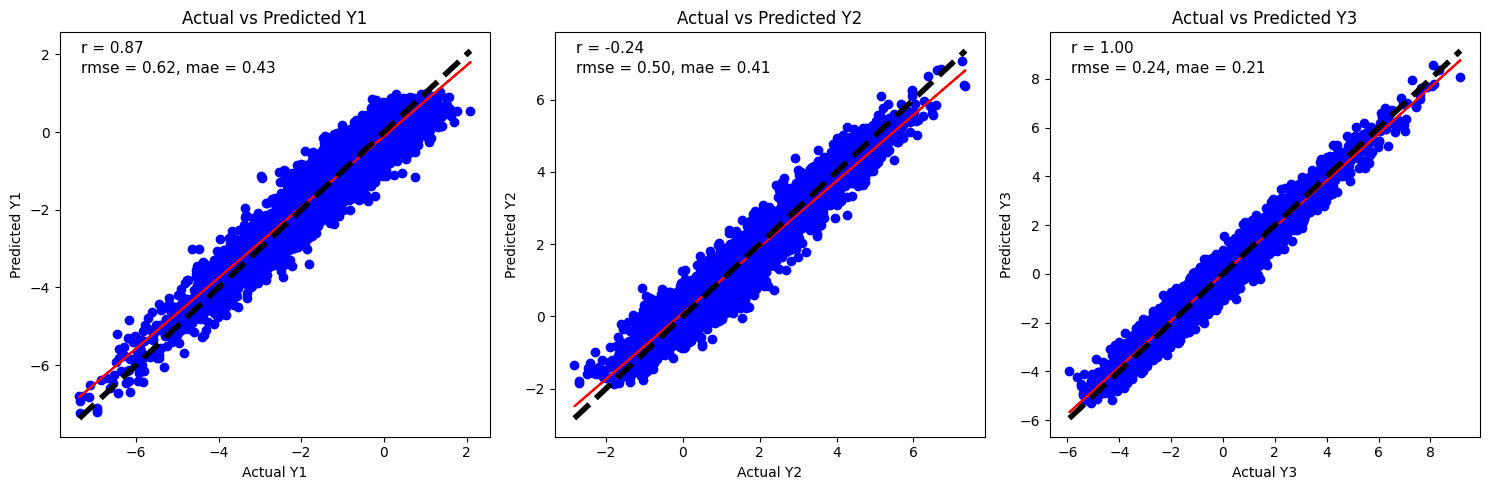

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
for i, ax in enumerate(axs):
    ax.scatter(Y_test[:, i], Y_pred1[:, i], color='blue')
    ax.set_title(f'Actual vs Predicted Y{i+1}')
    ax.set_xlabel(f'Actual Y{i+1}')
    ax.set_ylabel(f'Predicted Y{i+1}')

    corr = np.corrcoef(Y_test[i], Y_pred1[i])[0, 1]
    rmse = np.sqrt(np.mean((Y_test[i] - Y_pred1[i]) ** 2))
    mae = np.mean(np.abs(Y_test[i] - Y_pred1[i]))
    ax.annotate(f'r = {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=11)
    ax.annotate(f'rmse = {rmse:.2f}, mae = {mae:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=11)

    # Red Line(Best Fit)
    slope, intercept = compute_best_fit_line(Y_test[:, i], Y_pred1[:, i])
    ax.plot(Y_test[:, i], slope * Y_test[:, i] + intercept, color='red')
    # Black Line
    ax.plot([Y_test[:, i].min(), Y_test[:, i].max()], [Y_test[:, i].min(), Y_test[:, i].max()], 'k--', lw=4)
plt.tight_layout()
plt.show()


# Method 2(Using Gradient Descents)

In [ ]:
# create model to find_out Wieght and Bais using Gradients Desent
def gradient_descent(x, y, learning_rate, n_iterations):
    n_samples, n_features = x.shape
    W = np.zeros((n_features, y.shape[1]))
    for _ in range(n_iterations):
        gradient = (2/n_samples) * x.T @ (x @ W - y)
        W -= learning_rate * gradient
    return W

W = gradient_descent(X_train, Y_train, learning_rate=0.01, n_iterations=10000)

def predict(x):
    return x @ W


In [ ]:
Y_pred=predict(X_test)
Y_pred

array([[-0.69410546,  1.67766375,  1.56742129],
       [-0.09520136,  0.16606119, -0.12296823],
       [-2.83306503,  1.93869414, -3.14525741],
       ...,
       [-3.14988918,  0.50825263, -1.85756667],
       [-2.20095253,  3.42599971, -2.51411059],
       [-1.21752109,  4.10693337,  3.35590484]])

In [ ]:
error=Y_test-Y_pred
RSS=np.sum(error**2,axis=0)
MSE=RSS/len(Y_test)
MSE

array([0.24082861, 0.233515  , 0.2307915 ])

In [ ]:
def compute_best_fit_line(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    slope = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    intercept = y_mean - slope * x_mean
    return slope, intercept

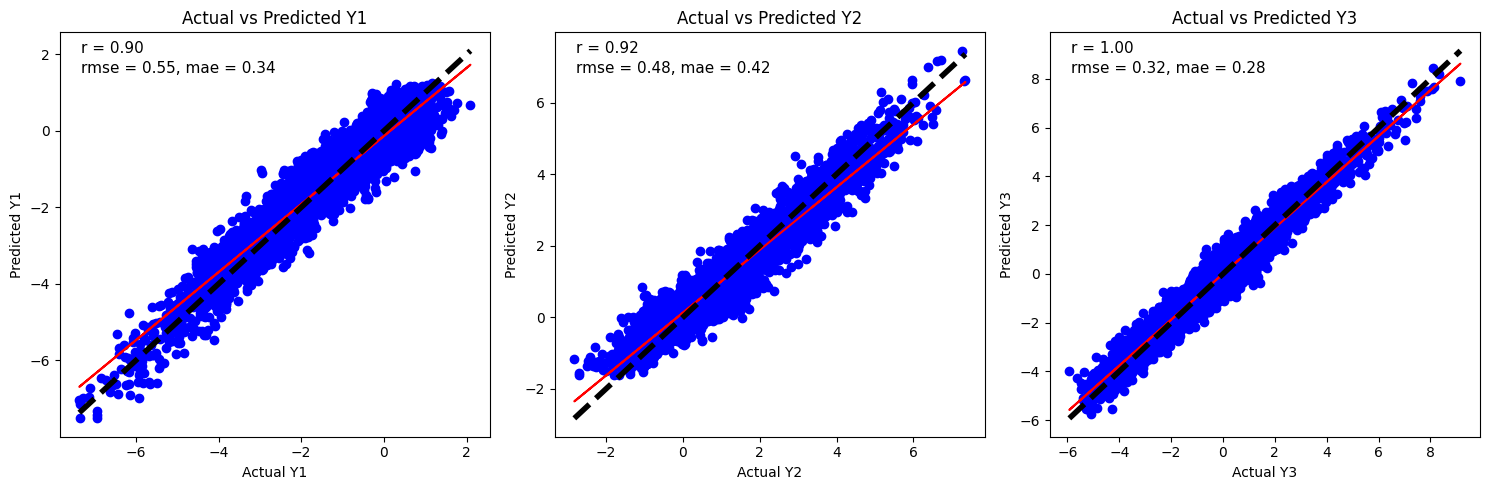

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
for i, ax in enumerate(axs):
    ax.scatter(Y_test[:, i], Y_pred[:, i], color='blue')
    ax.set_title(f'Actual vs Predicted Y{i+1}')
    ax.set_xlabel(f'Actual Y{i+1}')
    ax.set_ylabel(f'Predicted Y{i+1}')

    corr = np.corrcoef(Y_test[i], Y_pred[i])[0, 1]
    rmse = np.sqrt(np.mean((Y_test[i] - Y_pred[i]) ** 2))
    mae = np.mean(np.abs(Y_test[i] - Y_pred[i]))
    ax.annotate(f'r = {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=11)
    ax.annotate(f'rmse = {rmse:.2f}, mae = {mae:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=11)

    # Red Line(Best Fit)
    slope, intercept = compute_best_fit_line(Y_test[:, i], Y_pred[:, i])
    ax.plot(Y_test[:, i], slope * Y_test[:, i] + intercept, color='red')
    # Black Line
    ax.plot([Y_test[:, i].min(), Y_test[:, i].max()], [Y_test[:, i].min(), Y_test[:, i].max()], 'k--', lw=4)
plt.tight_layout()
plt.show()


### **Question-2: Generalized Linear Regression with Polynomial Kernel**






In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.loadtxt('regression_data_multiGen_group_1_train.txt', skiprows=1)
np.random.shuffle(data)

In [ ]:
data.shape

(14000, 5)

In [ ]:
X = data[:,:2]
y = data[:,2:]


In [ ]:
X_train, X_test = phi_X[0:11000,:], phi_X[11000:,:]
print(f"X_train shape : {X_train.shape}\nX_test shape : {X_test.shape}")
y_train, y_test = y[0:11000,:], y[11000:,]
print(f"Y_train shape : {y_train.shape}\nY_test shape : {y_test.shape}")

X_train shape : (11000, 6)
X_test shape : (3000, 6)
Y_train shape : (11000, 3)
Y_test shape : (3000, 3)


In [ ]:
# Using the polynomial kernel [1 x1 x2 x1^2 x2^2 x1*x2]
phi_X =  np.c_[np.ones(X.shape[0]), X[:, 0], X[:, 1], X[:, 0]**2, X[:, 1]**2, X[:,0]*X[:,1]]
params = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X_train), X_train)), np.transpose(X_train)), y_train)
params

array([[ -0.40945907,  -0.79242091,  -4.38875771],
       [ -0.22699946,  -7.13038148,   6.73041161],
       [ -8.56706104,   0.19624804, -11.64753112],
       [ -5.55595744,   7.24467815,   7.13596158],
       [ -4.73166009,   2.68476521,  -1.11834577],
       [ -1.53390754,  -3.56542507,   3.78894308]])

In [ ]:
y_pred = np.dot(X_test, params)
y_pred

array([[ -2.56429167,  10.99100537,   3.08828822],
       [-21.02299534,   4.71906429, -22.65381672],
       [ -3.84630147,  13.28685134,  22.35029679],
       ...,
       [  1.87588434,   3.72385362,   2.78955903],
       [-27.99220042,  31.84594334, -27.17753826],
       [-13.88315798,   9.28877936, -20.32012577]])

In [ ]:
N = 3000
MSE = (np.sum((y_pred - y_test)**2, axis=0))/ N
RMSE = np.sqrt(MSE)
RMSE

array([3.51910867, 5.08575963, 5.05936477])

In [ ]:
N = 3000
MSE = (np.sum((y_pred - y_test)**2))/ N
RMSE = np.sqrt(MSE)
RMSE

3.5191086700687477

In [ ]:
MAE = np.sum(np.abs(y_pred - y_test), axis=0) / N
MAE

array([2.82538528, 3.98913672, 3.90196476])

In [ ]:
pearson_coeff0 = np.corrcoef(y_pred[:,0], y_test[:,0])[0, 1]
pearson_coeff1 = np.corrcoef(y_pred[:,1], y_test[:,1])[0, 1]
pearson_coeff2 = np.corrcoef(y_pred[:,2], y_test[:,2])[0, 1]
pear_coeff = np.array([pearson_coeff0, pearson_coeff1 ,pearson_coeff2])
pear_coeff

array([0.93124569, 0.85936804, 0.93370069])

In [ ]:
# Define a function to compute the best fit line parameters
def compute_best_fit_line(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    slope = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    intercept = y_mean - slope * x_mean
    return slope, intercept


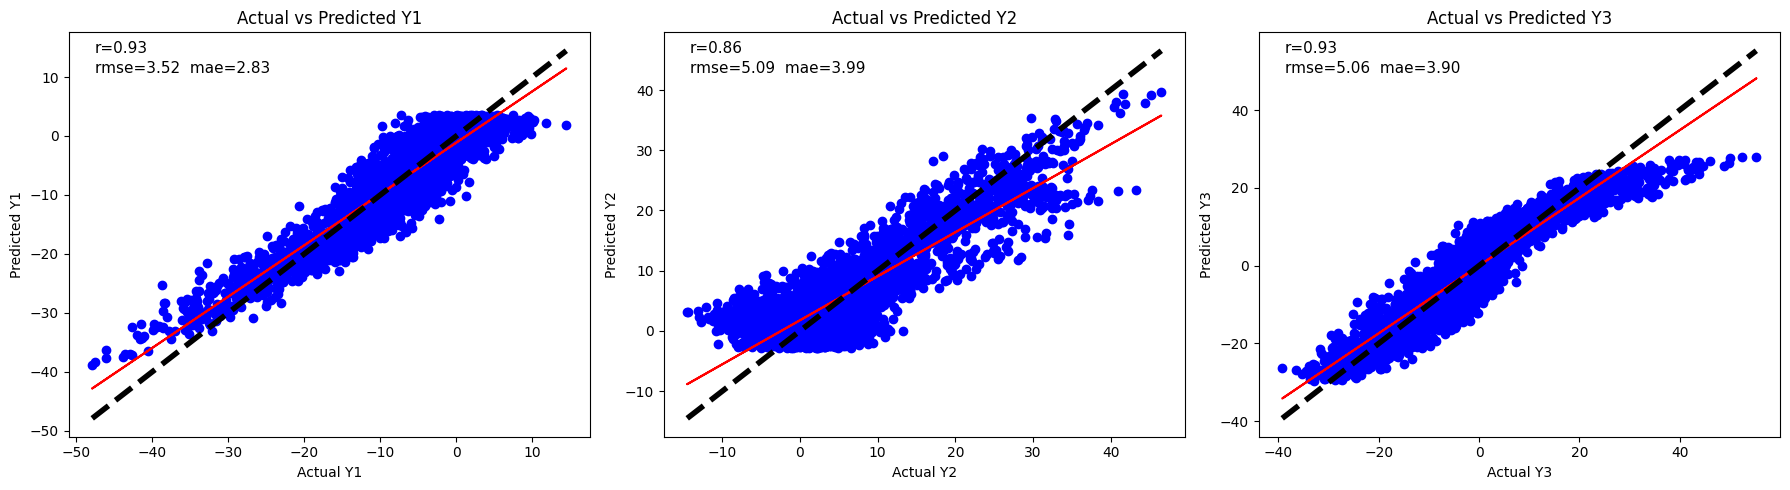

In [ ]:
num_y_vars = y_test.shape[1]


fig, axs = plt.subplots(1, num_y_vars, figsize=(18, 5))

# Iterate over each Y variable
for i, ax in enumerate(axs):
    ax.scatter(y_test[:, i], y_pred[:, i], color='blue')
    ax.set_title(f'Actual vs Predicted Y{i+1}')
    ax.set_xlabel(f'Actual Y{i+1}')
    ax.set_ylabel(f'Predicted Y{i+1}')
    ax.annotate(f'r={pear_coeff[i]:.2f}',xy=(0.05, 0.95), xycoords='axes fraction', fontsize=11)
    ax.annotate(f'rmse={RMSE[i]:.2f}  mae={MAE[i]:.2f}', xy=(0.05,0.9), xycoords='axes fraction', fontsize=11)


    slope, intercept = compute_best_fit_line(y_test[:, i], y_pred[:, i])
    ax.plot(y_test[:, i], slope * y_test[:, i] + intercept, color='red')  # Best fit line

    ax.plot([y_test[:, i].min(), y_test[:, i].max()], [y_test[:, i].min(), y_test[:, i].max()], 'k--', lw=4)

plt.tight_layout()
plt.show()


# Questions 3

In [ ]:
data2=np.loadtxt('/content/drive/My Drive/Prnn_data_group_1/regression_data_uni_group_1_train.txt' ,skiprows=1)
data2

array([[-1.23736775, -0.94492578,  0.54006185,  0.3272847 , -0.84162533,
         0.62418383],
       [ 0.8881525 ,  0.77590758,  0.45923619,  0.6308466 , -0.8883142 ,
         0.95569175],
       [-0.68225591, -0.63054555, -0.88884805,  0.77615224, -0.45820208,
         0.00981184],
       ...,
       [ 1.2854311 ,  0.9595589 , -0.65539135,  0.28150792, -0.75528947,
         0.33901735],
       [-0.73872656, -0.67334697, -0.79886924,  0.73932663, -0.60150473,
         0.00394303],
       [ 1.22869028,  0.94205023, -0.51797179,  0.33547184, -0.8553977 ,
         0.7585291 ]])

In [ ]:
x_data=data2[:, :5]
y_data=data2[:, 5:]
x_data,y_data

(array([[-1.23736775, -0.94492578,  0.54006185,  0.3272847 , -0.84162533],
        [ 0.8881525 ,  0.77590758,  0.45923619,  0.6308466 , -0.8883142 ],
        [-0.68225591, -0.63054555, -0.88884805,  0.77615224, -0.45820208],
        ...,
        [ 1.2854311 ,  0.9595589 , -0.65539135,  0.28150792, -0.75528947],
        [-0.73872656, -0.67334697, -0.79886924,  0.73932663, -0.60150473],
        [ 1.22869028,  0.94205023, -0.51797179,  0.33547184, -0.8553977 ]]),
 array([[0.62418383],
        [0.95569175],
        [0.00981184],
        ...,
        [0.33901735],
        [0.00394303],
        [0.7585291 ]]))

In [ ]:
n_samples = x_data.shape[0]
bias = np.ones((n_samples, 1))
x_data = np.concatenate([x_data, bias], axis=1)
x_data

array([[-1.23736775, -0.94492578,  0.54006185,  0.3272847 , -0.84162533,
         1.        ],
       [ 0.8881525 ,  0.77590758,  0.45923619,  0.6308466 , -0.8883142 ,
         1.        ],
       [-0.68225591, -0.63054555, -0.88884805,  0.77615224, -0.45820208,
         1.        ],
       ...,
       [ 1.2854311 ,  0.9595589 , -0.65539135,  0.28150792, -0.75528947,
         1.        ],
       [-0.73872656, -0.67334697, -0.79886924,  0.73932663, -0.60150473,
         1.        ],
       [ 1.22869028,  0.94205023, -0.51797179,  0.33547184, -0.8553977 ,
         1.        ]])

# Using Sigmoid Kernal

In [ ]:
x_data_1=np.zeros(x_data.shape)
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

for i in range(len(y_data)):
  for j in range(5):
    x_data_1[i][j]=sigmoid(x_data[i][j])

x_data_1

array([[0.2248945 , 0.27990643, 0.63182681, 0.58109856, 0.30119258,
        0.        ],
       [0.70850877, 0.68479743, 0.61283296, 0.6526814 , 0.29145784,
        0.        ],
       [0.33575799, 0.34738685, 0.29134761, 0.68485024, 0.38741243,
        0.        ],
       ...,
       [0.78337285, 0.72303348, 0.34177564, 0.56991587, 0.31966985,
        0.        ],
       [0.32328267, 0.3377478 , 0.31026745, 0.67684859, 0.35399951,
        0.        ],
       [0.77358926, 0.71951361, 0.37332662, 0.58309016, 0.29830179,
        0.        ]])

In [ ]:
x_data_train,x_data_test,y_data_train,y_data_test=x_data_1[:5000],x_data_1[5000:],y_data[:5000],y_data[5000:]
x_data_train.shape,x_data_test.shape,y_data_train.shape,y_data_test.shape

((5000, 6), (2000, 6), (5000, 1), (2000, 1))

In [ ]:
def gradient_descent(x, y, learning_rate, n_iterations):
    n_samples, n_features = x.shape
    W = np.zeros((n_features, y.shape[1]))
    for _ in range(n_iterations):
        gradient = (2/n_samples) * x.T @ (x @ W - y)
        W -= learning_rate * gradient
    return W

W = gradient_descent(x_data_train, y_data_train, learning_rate=0.01, n_iterations=5000)

def predict(x):
    return x @ W

y_data_pred=predict(x_data_test)
y_data_pred,y_data_test

(array([[ 0.5168589 ],
        [ 0.53379183],
        [-0.10126812],
        ...,
        [ 0.31565457],
        [ 0.24113248],
        [ 0.39290005]]),
 array([[6.82370683e-03],
        [4.99326263e-03],
        [1.68145640e-04],
        ...,
        [3.39017352e-01],
        [3.94302627e-03],
        [7.58529101e-01]]))

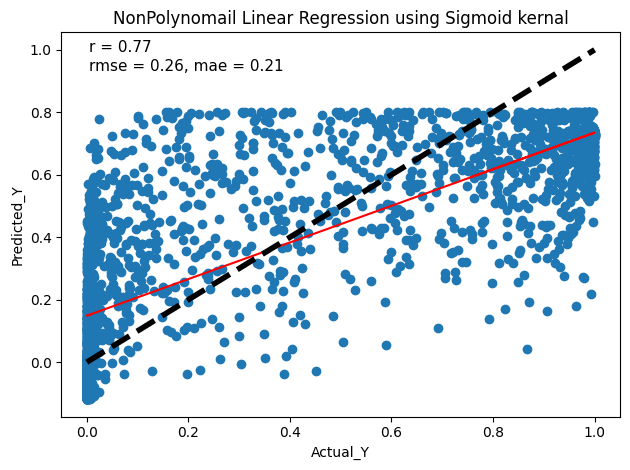

In [ ]:
def compute_best_fit_line(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    slope = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    intercept = y_mean - slope * x_mean
    return slope, intercept


correlation = np.corrcoef(y_data_test.T, y_data_pred.T)[0, 1]
rmse = np.sqrt(np.mean((y_data_test - y_data_pred) ** 2))
mae = np.mean(np.abs(y_data_test - y_data_pred))
plt.annotate(f'r = {correlation:.2f}',xy=(0.05, 0.95), xycoords='axes fraction', fontsize=11)
plt.annotate(f'rmse = {rmse:.2f}, mae = {mae:.2f}',xy=(0.05, 0.9), xycoords='axes fraction', fontsize=11)
#Red Line (Best fit)
slope, intercept = compute_best_fit_line(y_data_test, y_data_pred)
plt.plot(y_data_test, slope * y_data_test + intercept, color='red')

#Black Line (Y=x line)
plt.plot([y_data_test.min(), y_data_test.max()], [y_data_test.min(), y_data_test.max()], 'k--', lw=4)
plt.scatter(y_data_test, y_data_pred, label='Data Points')

plt.title(f'NonPolynomail Linear Regression using Sigmoid kernal')
plt.xlabel('Actual_Y')
plt.ylabel('Predicted_Y')
plt.tight_layout()
plt.show()

# Using Exponential Kernal

In [ ]:
def exponential(x, a, b):
    return np.tan(np.arctan(a * np.exp(b * x)-0.5, dtype=np.float64))
    #return a * np.exp(b * x)

x_data_2=np.zeros(x_data.shape)
for i in range(len(y_data)):
  for j in range(5):
    x_data_2[i][j]=exponential(x_data[i][j],1.1,0.1)


x_data_train_2,x_data_test_2,y_data_train_2,y_data_test_2=x_data_2[:5000],x_data_2[5000:],y_data[:5000],y_data[5000:]


def gradient_descent(x, y, learning_rate, n_iterations):
    n_samples, n_features = x.shape
    W = np.zeros((n_features, y.shape[1]))
    for _ in range(n_iterations):
        gradient = (2/n_samples) * x.T @ (x @ W - y)
        W -= learning_rate * gradient
    return W

W = gradient_descent(x_data_train_2, y_data_train_2, learning_rate=0.01, n_iterations=5000)

def predict(x):
    return x @ W

y_data_pred_2=predict(x_data_test)
y_data_pred_2,y_data_test_2

(array([[ 0.53320658],
        [ 0.50308238],
        [-0.1756164 ],
        ...,
        [ 0.29571923],
        [ 0.12415466],
        [ 0.36732623]]),
 array([[6.82370683e-03],
        [4.99326263e-03],
        [1.68145640e-04],
        ...,
        [3.39017352e-01],
        [3.94302627e-03],
        [7.58529101e-01]]))

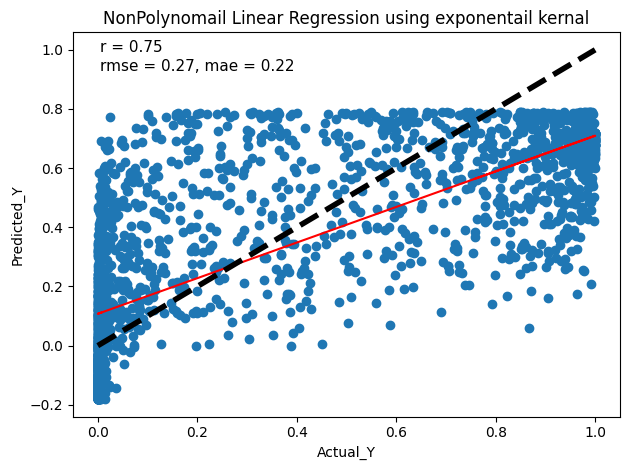

In [ ]:
corr_2 = np.corrcoef(y_data_test_2.T, y_data_pred_2.T)[0, 1]
rmse = np.sqrt(np.mean((y_data_test_2 - y_data_pred_2) ** 2))
mae = np.mean(np.abs(y_data_test_2 - y_data_pred_2))
plt.annotate(f'r = {corr_2:.2f}',xy=(0.05, 0.95), xycoords='axes fraction', fontsize=11)
plt.annotate(f'rmse = {rmse:.2f}, mae = {mae:.2f}',xy=(0.05, 0.9), xycoords='axes fraction', fontsize=11)
#Red Line (Best fit)
slope, intercept = compute_best_fit_line(y_data_test_2, y_data_pred_2)
plt.plot(y_data_test, slope * y_data_test + intercept, color='red')

#Black Line (Y=x line)
plt.plot([y_data_test_2.min(), y_data_test_2.max()], [y_data_test_2.min(), y_data_test_2.max()], 'k--', lw=4)
plt.scatter(y_data_test_2, y_data_pred_2, label='Data Points')

plt.title(f'NonPolynomail Linear Regression using exponentail kernal')
plt.xlabel('Actual_Y')
plt.ylabel('Predicted_Y')
plt.tight_layout()
plt.show()

# Using Gaussian Kernal

In [ ]:
myu=np.mean(x_data,axis=1)
myu

array([-0.19276205,  0.47763811, -0.14728322, ...,  0.35263619,
       -0.17885348,  0.35547381])

In [ ]:
def gauss_kernel(x, myu, sigma):
    return np.exp(-np.linalg.norm(x - myu)**2 / (2 * sigma**2))

x_data_3=np.zeros(x_data.shape)
for i in range(len(y_data)):
  for j in range(5):
    x_data_3[i][j]=gauss_kernel(x_data[i][j],myu[i],sigma=0.95)


x_data_train_3,x_data_test_3,y_data_train_3,y_data_test_3=x_data_3[:5000],x_data_3[5000:],y_data[:5000],y_data[5000:]


def gradient_descent(x, y, learning_rate, n_iterations):
    n_samples, n_features = x.shape
    W = np.zeros((n_features, y.shape[1]))
    for _ in range(n_iterations):
        gradient = (2/n_samples) * x.T @ (x @ W - y)
        W -= learning_rate * gradient
    return W

W = gradient_descent(x_data_train_3, y_data_train_3, learning_rate=0.05, n_iterations=5000)

def predict(x):
    return x @ W

y_data_pred_3=predict(x_data_test)
y_data_pred_3,y_data_test_3

(array([[ 0.42313869],
        [-0.06566668],
        [ 0.15135822],
        ...,
        [-0.26594844],
        [ 0.33182443],
        [-0.19928215]]),
 array([[6.82370683e-03],
        [4.99326263e-03],
        [1.68145640e-04],
        ...,
        [3.39017352e-01],
        [3.94302627e-03],
        [7.58529101e-01]]))

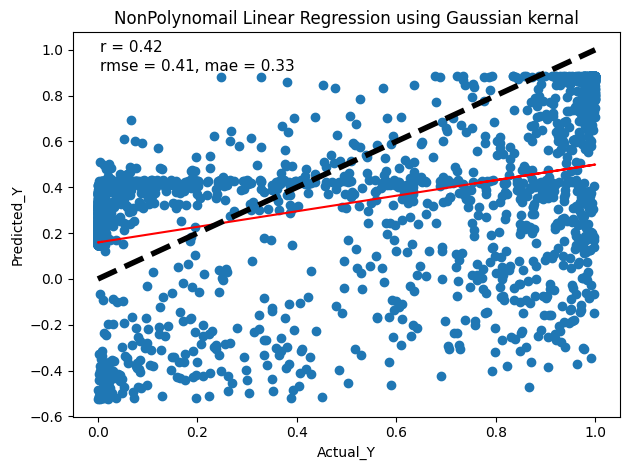

In [ ]:
corr_3 = np.corrcoef(y_data_test_3.T, y_data_pred_3.T)[0, 1]
rmse = np.sqrt(np.mean((y_data_test_3 - y_data_pred_3) ** 2))
mae = np.mean(np.abs(y_data_test_3 - y_data_pred_3))
plt.annotate(f'r = {corr_3:.2f}',xy=(0.05, 0.95), xycoords='axes fraction', fontsize=11)
plt.annotate(f'rmse = {rmse:.2f}, mae = {mae:.2f}',xy=(0.05, 0.9), xycoords='axes fraction', fontsize=11)
#Red Line (Best fit)
slope, intercept = compute_best_fit_line(y_data_test_3, y_data_pred_3)
plt.plot(y_data_test, slope * y_data_test + intercept, color='red')

#Black Line (Y=x line)
plt.plot([y_data_test_3.min(), y_data_test_3.max()], [y_data_test_3.min(), y_data_test_3.max()], 'k--', lw=4)
plt.scatter(y_data_test_2, y_data_pred_3, label='Data Points')

plt.title(f'NonPolynomail Linear Regression using Gaussian kernal')
plt.xlabel('Actual_Y')
plt.ylabel('Predicted_Y')
plt.tight_layout()
plt.show()

#Q4: General Data Setup

In [235]:
import numpy as np
import matplotlib.pyplot as plt

In [236]:
data=np.loadtxt('/content/drive/MyDrive/Colab Notebooks/binary_classification_data_group_0_train.txt',skiprows=1)

In [237]:
# data=np.loadtxt('/content/multi_class_classification_data_group_0_train.txt',skiprows=1)

In [238]:
np.random.shuffle(data)
X_data=data[:,:-1]
Y_label=data[:,-1]

In [239]:
split_index=int(0.8*len(data))
train_X=X_data[0:split_index]
train_Y=Y_label[0:split_index]
test_X=X_data[split_index:]
test_Y=Y_label[split_index:]

In [240]:
data.shape

(14000, 11)

In [241]:
K=len(np.unique(Y_label))   #Number of classes
total_count=0
Y_count=np.zeros(K,dtype=int)
for i in range(len(train_Y)):
    temp=int(train_Y[i])
    Y_count[temp]=Y_count[temp]+1
    total_count=total_count+1

In [242]:
print("Total class with label 0 = "+str(Y_count[0]))
print("Total class with label 1 = "+str(Y_count[1]))

Total class with label 0 = 5609
Total class with label 1 = 5591


In [243]:
prior_prob=np.zeros(len(Y_count))
for i in range(len(Y_count)):
  prior_prob[i]=Y_count[i]/total_count

#Q4: Multivariate Gaussian Class Conditional densities

In [1]:
def find_mean(class_y):
  class_data = train_X[train_Y == class_y]
  mean=np.mean(class_data,axis=0)
  return mean

In [2]:
mean=find_mean(0)
print(mean)

NameError: name 'train_X' is not defined

In [ ]:
def find_covariance_matrix(class_y):
    class_data = train_X[train_Y == class_y]
    cov_matrix = np.cov(class_data, rowvar=False)
    return cov_matrix

In [ ]:
def calculate_parameters(train_X,train_Y):
    classes = np.unique(train_Y)
    means = {}
    covariances = {}
    for c in classes:
        mean = find_mean(c)
        cov = find_covariance_matrix(c)
        means[c] = mean
        covariances[c] = cov

    return means, covariances

In [ ]:
means,covariances=calculate_parameters(train_X,train_Y)

In [ ]:
def multivariate_gaussian(x, mean, cov):

    d = len(x)
    det = np.linalg.det(cov)
    norm_const = 1.0/ ( np.power((2*np.pi),float(d)/2) * np.power(det,1.0/2) )
    x_mu = np.matrix(x - mean)
    inv = np.linalg.inv(cov)
    power_term = np.power(np.e, -0.5 * (x_mu * inv * x_mu.T))

    return norm_const * power_term

In [ ]:
def bayesian_classifier(test_X):
  pred_score=[]
  class_score=np.zeros(K,dtype=float)
  y_pred=[]
  for x in test_X:
    for i in range(K):
      mean=means[i]
      cov=covariances[i]
      class_score[i]=multivariate_gaussian(x,mean,cov)*prior_prob[i]
      result_class=np.argmax(class_score)
    pred_score.append(class_score[1]/np.sum(class_score))
    y_pred.append(result_class)
  y_pred=np.array(y_pred)
  return y_pred,pred_score

For Dependent Feature Values Case

In [ ]:
pred_Y,pred_score=bayesian_classifier(test_X)

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(test_Y, pred_score)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Dependent Features (Gaussian CCD)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy=np.mean(pred_Y==test_Y)
print("Percentage Accuracy: "+str(accuracy*100))
confusion_matrix=np.zeros((K,K))
for j in range(len(test_Y)):
  pred=int(pred_Y[j])
  test=int(test_Y[j])
  confusion_matrix[pred][test]=confusion_matrix[pred][test]+1

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

print("\nTrue Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

Model_Precision=TP/(TP+FP)
Model_Recall=TP/(TP+FN)

print("\nModel Precision: ",Model_Precision)
print("Model Recall: ",Model_Recall)

f1 = [2 * (p * r) / (p + r) for p, r in zip(Model_Precision, Model_Recall)]

print("\nF1 score for each class: ", f1)

For Independent Case

In [ ]:
for j in range(len(covariances)):
  variances = np.diag(covariances[j])
  covariances[j]= np.diag(variances)

In [ ]:
pred_Y,pred_score=bayesian_classifier(test_X)

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(test_Y, pred_score)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Independent Features  (Gaussian CCD)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy=np.mean(pred_Y==test_Y)
print("Percentage Accuracy: "+str(accuracy*100))
confusion_matrix=np.zeros((K,K))
for j in range(len(test_Y)):
  pred=int(pred_Y[j])
  test=int(test_Y[j])
  confusion_matrix[pred][test]=confusion_matrix[pred][test]+1

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

print("\nTrue Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

Model_Precision=TP/(TP+FP)
Model_Recall=TP/(TP+FN)

print("\nModel Precision: ",Model_Precision)
print("Model Recall: ",Model_Recall)

f1 = [2 * (p * r) / (p + r) for p, r in zip(Model_Precision, Model_Recall)]

print("\nF1 score for each class: ", f1)


#Q4: GMM Class conditional density

In [220]:
def multivariate_gaussian1(x, mean, cov):

    d = len(x)
    det = np.linalg.det(cov)
    norm_const = 1.0/ ( np.power((2*np.pi),float(d)/2) * np.power(det,1.0/2) )
    x_mu = np.matrix(x - mean)
    inv = np.linalg.inv(cov)
    power_term = np.power(np.e, -0.5 * (x_mu * inv * x_mu.T))

    return norm_const * power_term

def multivariate_gaussian2(x, mu, sigma):
    D = x.shape[1]
    det_sigma = np.linalg.det(sigma)
    inv_sigma = np.linalg.inv(sigma)
    norm_const = 1.0 / (np.power((2*np.pi), D/2) * np.sqrt(np.abs(det_sigma)))
    x_mu = x - mu
    result = norm_const * np.exp(-0.5 * np.sum(np.dot(x_mu, inv_sigma) * x_mu, axis=1))
    return result

def e_step(X, mu, sigma, pi, K):
    N = X.shape[0]
    gamma = np.zeros((N, K))
    for k in range(K):
        gamma[:, k] = pi[k] * multivariate_gaussian2(X, mu[k], sigma[k])

    if(gamma.sum(axis=1, keepdims=True).all()==0):
       return 0
    gamma /= gamma.sum(axis=1, keepdims=True)
    return gamma

def m_step(X, gamma):
    N, D = X.shape
    K = gamma.shape[1]
    mu = np.zeros((K, D))
    sigma = np.zeros((K, D, D))
    pi = np.zeros(K)

    for k in range(K):
        N_k = gamma[:, k].sum()
        mu[k] = np.sum(gamma[:, k].reshape(-1, 1) * X, axis=0) / N_k
        x_mu = np.dot((X - mu[k]).T, np.diag(gamma[:, k]))
        sigma[k] = np.dot(x_mu, (X - mu[k])) / N_k
        pi[k] = N_k / N

    return mu, sigma, pi

def em_algorithm(X, mu, sigma, pi, K, tol):
    mu_prev, sigma_prev = mu.copy(), sigma.copy()
    it_count=0
    while True:
        it_count=it_count+1
        gamma = e_step(X, mu, sigma, pi, K)
        mu, sigma, pi = m_step(X, gamma)
        mu_diff = np.linalg.norm(mu - mu_prev)
        sigma_diff = np.linalg.norm(sigma - sigma_prev)
        # if mu_diff < tol and sigma_diff < tol:
        # print(mu_diff)
        if mu_diff <= tol:
          break

        mu_prev, sigma_prev = mu.copy(), sigma.copy()
        # print(mu_diff,sigma_diff)
    # print("\nTotal Iteration_count: ",it_count)
    return mu, sigma, pi


In [221]:
def gmm(train_X,train_Y,n_mixtures):
  initial_means_set=[]
  d=train_X.shape[1]
  n=n_mixtures
  for j in range(K):
    means_set=[]
    for i in range(n):
      rand_vect=np.random.uniform(low=-1, high=1, size=d)/6
      means_set.append(means[j]+rand_vect)
    initial_means_set.append(means_set)

  initial_means_set=np.array(initial_means_set)

  initial_cov_set=[]
  for j in range(K):
    cov_set=[]
    for i in range(n):
      rand_matrix=np.random.uniform(low=-1, high=1, size=(d,d))/6
      cov_set.append(covariances[j]+rand_matrix)
    initial_cov_set.append(cov_set)

  initial_cov_set=np.array(initial_cov_set)
  final_means_set=[]
  final_cov_set=[]
  final_dis_set=[]
  for i in range(K):
    class_means=[]
    class_cov=[]
    dis=[]
    class_data=train_X[train_Y==i]
    pi=np.ones(n)/n
    class_means,class_cov,dis=em_algorithm(class_data,initial_means_set[i],initial_cov_set[i],pi,n,0.11)
    final_means_set.append(class_means)
    final_cov_set.append(class_cov)
    final_dis_set.append(dis)

  final_means_set=np.array(final_means_set)
  final_cov_set=np.array(final_cov_set)
  final_dis_set=np.array(final_dis_set)
  return final_means_set,final_cov_set,final_dis_set

For Dependent Feature vector case

In [223]:
final_means_set,final_cov_set,final_dis_set=gmm(train_X,train_Y,5)

In [224]:
def avg_likelihood(class_y,n):
      print("iteration: ",n)
      final_means_set,final_cov_set,final_dis_set=gmm(train_X,train_Y,n)
      val=0
      for j in range(n):
          mean=final_means_set[class_y][j]
          cov=final_cov_set[class_y][j]
          X=np.where(train_Y==class_y,)
          val=val+final_dis_set[class_y][j]*multivariate_gaussian2(test_X[test_Y==class_y],mean,cov)

      mean_likelihood = np.mean(val)
      return mean_likelihood

iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7


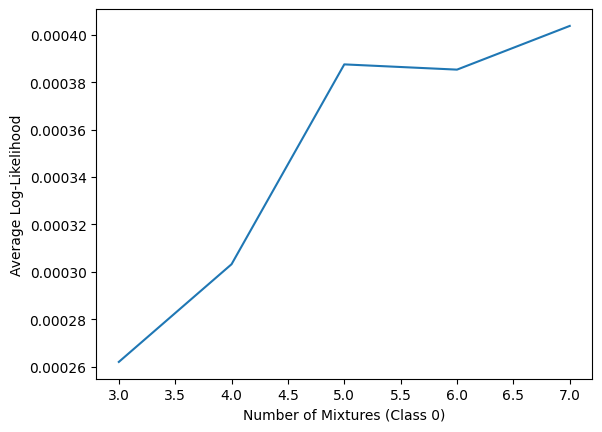

In [142]:
n_mixtures = range(3, 8)
mean_likelihoods = []

for i in n_mixtures:
  mean_likelihoods.append(avg_likelihood(0,i))

plt.plot(n_mixtures, mean_likelihoods)
plt.xlabel('Number of Mixtures (Class 0)')
plt.ylabel('Average Log-Likelihood')
plt.show()

iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7


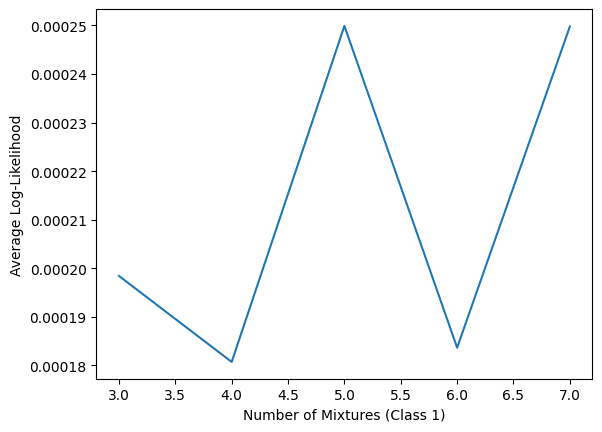

In [144]:
n_mixtures = range(3, 8)
mean_likelihoods = []

for i in n_mixtures:
  mean_likelihoods.append(avg_likelihood(1,i))

plt.plot(n_mixtures, mean_likelihoods)
plt.xlabel('Number of Mixtures (Class 1)')
plt.ylabel('Average Log-Likelihood')
plt.show()

In [225]:
def gmm_bayesian_classifier(test_X,n):
  pred_score=[]
  class_score=np.zeros(K,dtype=float)
  y_pred=[]
  for x in test_X:
    for i in range(K):
      val=0
      for j in range(n):
        mean=final_means_set[i][j]
        cov=final_cov_set[i][j]
        val=val+final_dis_set[i][j]*multivariate_gaussian1(x,mean,cov)
        class_score[i]=val*prior_prob[i]
        result_class=np.argmax(class_score)
    pred_score.append(class_score[1]/np.sum(class_score))
    y_pred.append(result_class)
  y_pred=np.array(y_pred)
  return y_pred,pred_score

In [226]:
pred_Y,pred_score=gmm_bayesian_classifier(test_X,5)

<ipython-input-225-77feab4b4030>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_score[i]=val*prior_prob[i]


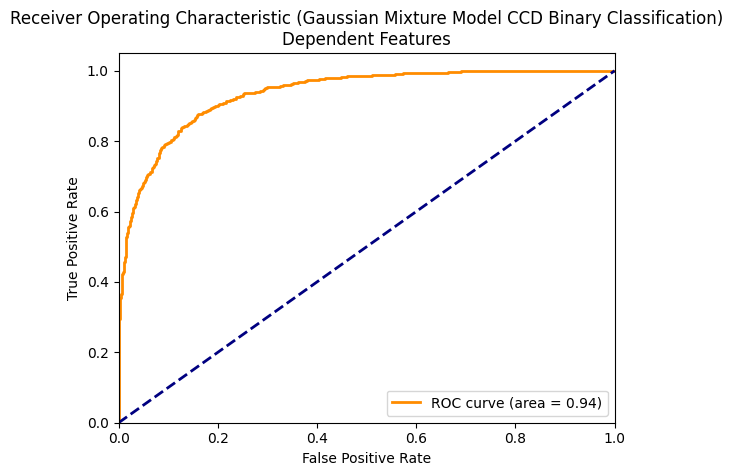

In [228]:
fpr, tpr, _ = roc_curve(test_Y, pred_score)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Gaussian Mixture Model CCD Binary Classification)\nDependent Features')
plt.legend(loc="lower right")
plt.show()

In [229]:
accuracy=np.mean(pred_Y==test_Y)
print("Percentage Accuracy: "+str(100*accuracy))
confusion_matrix=np.zeros((K,K))
for j in range(len(test_Y)):
  pred=int(pred_Y[j])
  test=int(test_Y[j])
  confusion_matrix[pred][test]=confusion_matrix[pred][test]+1

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

print("\nTrue Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

Model_Precision=TP/(TP+FP)
Model_Recall=TP/(TP+FN)

print("\nModel Precision: ",Model_Precision)
print("Model Recall: ",Model_Recall)

f1 = [2 * (p * r) / (p + r) for p, r in zip(Model_Precision, Model_Recall)]

print("\nF1 score for each class: ", f1)

macro_f1 = sum(f1) / len(f1)
print("Macro-average F1 score: ", macro_f1)

micro_precision = sum(TP) / (sum(TP) + sum(FP))
micro_recall = sum(TP) / (sum(TP) + sum(FN))
micro_f1 = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)
print("Micro-average F1 score: ", micro_f1)

weights = [sum(row) for row in zip(TP, FP, FN)]
weighted_f1 = sum(f * w for f, w in zip(f1, weights)) / sum(weights)
print("Weighted-average F1 score: ", weighted_f1)


Percentage Accuracy: 85.42857142857143

True Positives: [1205. 1187.]
True Negatives: [1187. 1205.]
False Positives: [212. 196.]
False Negatives: [196. 212.]

Model Precision:  [0.85038814 0.8582791 ]
Model Recall:  [0.86009993 0.84846319]

F1 score for each class:  [0.8552164655784246, 0.8533429187634796]
Macro-average F1 score:  0.8542796921709521
Micro-average F1 score:  0.8542857142857143
Weighted-average F1 score:  0.8542849483808443


For Independent Feature vector case

In [230]:
def gmm(train_X,train_Y,n_mixtures):
  initial_means_set=[]
  d=train_X.shape[1]
  n=n_mixtures
  for j in range(K):
    means_set=[]
    for i in range(n):
      rand_vect=np.random.uniform(low=-1, high=1, size=d)/6
      means_set.append(means[j]+rand_vect)
    initial_means_set.append(means_set)

  initial_means_set=np.array(initial_means_set)

  initial_cov_set=[]
  for j in range(K):
    cov_set=[]
    for i in range(n):
      rand_matrix=np.random.uniform(low=-1, high=1, size=(d,d))/6
      cov_set.append(covariances[j]+rand_matrix)
    initial_cov_set.append(cov_set)

  initial_cov_set=np.array(initial_cov_set)
  final_means_set=[]
  final_cov_set=[]
  final_dis_set=[]
  for i in range(K):
    class_means=[]
    class_cov=[]
    dis=[]
    class_data=train_X[train_Y==i]
    pi=np.ones(n)/n
    class_means,class_cov,dis=em_algorithm(class_data,initial_means_set[i],initial_cov_set[i],pi,n,0.11)
    final_means_set.append(class_means)
    final_cov_set.append(class_cov)
    final_dis_set.append(dis)

  final_means_set=np.array(final_means_set)
  final_cov_set=np.array(final_cov_set)
  final_dis_set=np.array(final_dis_set)

  for i in range(len(final_cov_set)):
    for j in range(len(final_cov_set[i])):
      variances = np.diag(final_cov_set[i][j])
      final_cov_set[i][j]= np.diag(variances)

  return final_means_set,final_cov_set,final_dis_set


In [216]:
n_mixtures = range(3,15)
mean_likelihoods = []

In [231]:
def avg_likelihood(class_y,n):
    print("iteration: ",n)
    final_means_set,final_cov_set,final_dis_set=gmm(train_X,train_Y,n)
    val=0
    for j in range(n):
     mean=final_means_set[class_y][j]
     cov=final_cov_set[class_y][j]
     val=val+final_dis_set[class_y][j]*multivariate_gaussian2(test_X[test_Y==class_y],mean,cov)

    mean_likelihood = np.mean(val)
    return mean_likelihood


In [ ]:
n_mixtures = range(3,15)
mean_likelihoods = []
for i in range(3,15):
  mean_likelihoods.append(avg_likelihood(0,i))

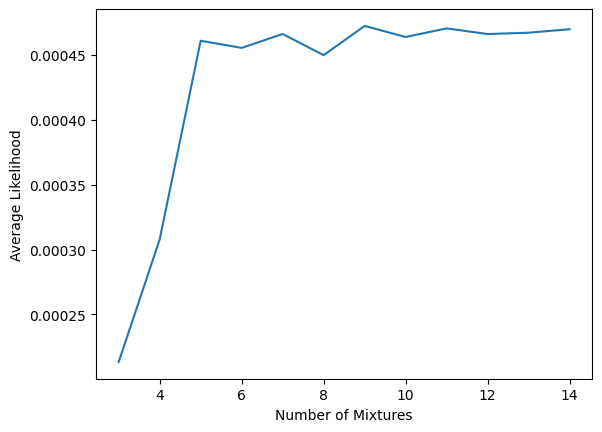

In [119]:
plt.plot(n_mixtures, mean_likelihoods)
plt.xlabel('Number of Mixtures (Class 0)')
plt.ylabel('Average Likelihood')
plt.show()

In [ ]:
n_mixtures = range(3,15)
mean_likelihoods = []
for i in range(3,15):
  mean_likelihoods.append(avg_likelihood(1,i))

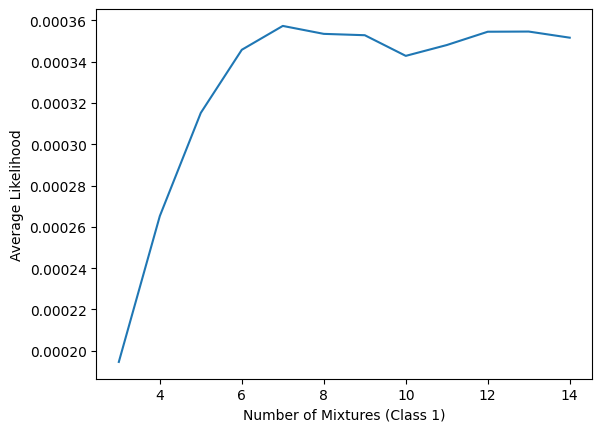

In [157]:
plt.plot(n_mixtures, mean_likelihoods)
plt.xlabel('Number of Mixtures (Class 1)')
plt.ylabel('Average Likelihood')
plt.show()

In [232]:
def gmm_bayesian_classifier(test_X,n):
  pred_score=[]
  class_score=np.zeros(K,dtype=float)
  y_pred=[]
  for x in test_X:
    for i in range(K):
      val=0
      for j in range(n):
        mean=final_means_set[i][j]
        cov=final_cov_set[i][j]
        val=val+final_dis_set[i][j]*multivariate_gaussian1(x,mean,cov)
        class_score[i]=val*prior_prob[i]
        result_class=np.argmax(class_score)
    pred_score.append(class_score[1]/np.sum(class_score))
    y_pred.append(result_class)
  y_pred=np.array(y_pred)
  return y_pred,pred_score

In [233]:
pred_Y,pred_score=gmm_bayesian_classifier(test_X,5)

<ipython-input-232-77feab4b4030>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_score[i]=val*prior_prob[i]


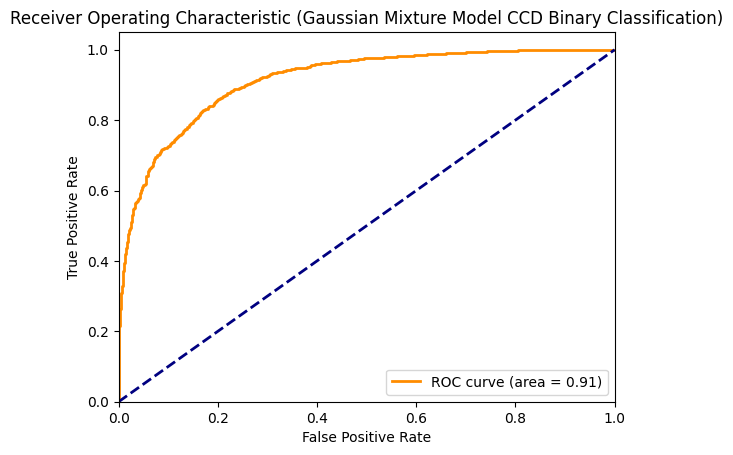

In [219]:
fpr, tpr, _ = roc_curve(test_Y, pred_score)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Gaussian Mixture Model CCD Binary Classification)')
plt.legend(loc="lower right")
plt.show()

In [213]:
accuracy=np.mean(pred_Y==test_Y)
print("Percentage Accuracy: "+str(100*accuracy))
confusion_matrix=np.zeros((K,K))
for j in range(len(test_Y)):
  pred=int(pred_Y[j])
  test=int(test_Y[j])
  confusion_matrix[pred][test]=confusion_matrix[pred][test]+1

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

print("\nTrue Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

Model_Precision=TP/(TP+FP)
Model_Recall=TP/(TP+FN)

print("\nModel Precision: ",Model_Precision)
print("Model Recall: ",Model_Recall)

f1 = [2 * (p * r) / (p + r) for p, r in zip(Model_Precision, Model_Recall)]

print("\nF1 score for each class: ", f1)



Percentage Accuracy: 82.75

True Positives: [1165. 1152.]
True Negatives: [1152. 1165.]
False Positives: [252. 231.]
False Negatives: [231. 252.]

Model Precision:  [0.82215949 0.8329718 ]
Model Recall:  [0.83452722 0.82051282]

F1 score for each class:  [0.8282971916103805, 0.8266953713670613]


#Q4: K-Nearest Neighbours

In [234]:
def knn_eucledian(x,k):
  dist=[]
  for vect in train_X:
    dist.append(np.dot(x,vect))

  y_list=[]
  for j in range(k):
    val=np.argmin(dist)
    y_list.append(train_Y[val])
    dist[val]=np.iinfo(np.int32).max

  counts=np.bincount(y_list)
  ans=np.argmax(counts)
  return ans

def knn_cosine(x,k):
  dist=[]
  for vect in train_X:
    cos_dist=1-np.dot(x,vect)/(np.linalg.norm(vect)*np.linalg.norm(x))
    dist.append(cos_dist)

  y_list=[]
  for j in range(k):
    val=np.argmin(dist)
    y_list.append(train_Y[val])
    dist[val]=np.iinfo(np.int32).max

  counts=np.bincount(y_list)
  ans=np.argmax(counts)
  return ans

In [ ]:
def knn_eu_predict(test_X,k):
  pred_y=[]
  for vect in test_X:
    pred_y.append(knn_eucledian(vect,k))
  pred_y=np.array(pred_y)
  return pred_y

def knn_cos_predict(test_X,k):
  pred_y=[]
  for vect in test_X:
    pred_y.append(knn_cosine(vect,k))
  pred_y=np.array(pred_y)
  return pred_y

KNN using Eucledian Distance

In [ ]:
for k in range(4,12):
  pred_y=knn_eu_predict(test_X,k)
  accuracy=np.mean(pred_y==test_Y)
  print("For K: ",k," Accuracy: ",accuracy*100)

For K:  4  Accuracy:  50.38095238095238
For K:  5  Accuracy:  49.738095238095234
For K:  6  Accuracy:  49.738095238095234
For K:  7  Accuracy:  49.357142857142854
For K:  8  Accuracy:  49.57142857142857
For K:  9  Accuracy:  49.30952380952381
For K:  10  Accuracy:  49.26190476190476
For K:  11  Accuracy:  49.238095238095234


KNN using Cosine Distance

In [ ]:
for k in range(4,12):
  pred_y=knn_cos_predict(test_X,k)
  accuracy=np.mean(pred_y==test_Y)
  print("For K: ",k," Accuracy: ",accuracy*100)

For K:  4  Accuracy:  75.69047619047619
For K:  5  Accuracy:  78.21428571428571
For K:  6  Accuracy:  78.16666666666666
For K:  7  Accuracy:  78.47619047619048
For K:  8  Accuracy:  78.66666666666666
For K:  9  Accuracy:  78.52380952380953
For K:  10  Accuracy:  78.85714285714286
For K:  11  Accuracy:  78.95238095238095


#Q4: Linear Classifier: Logistic Regressor


In [ ]:
import numpy as np

def sigmoid_func(x):
    return 1 / (1 + np.exp(-x))

def cross_entropy_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def gradient_descent_optimizer(train_X,train_Y,tol):
  samples_count=train_X.shape[0]
  w = np.zeros(train_X.shape[1])
  b = 0
  prev_loss=np.inf
  while True:
        val=np.dot(train_X, w) + b
        y_predicted = sigmoid_func(val)
        current_loss = cross_entropy_loss(train_Y, y_predicted)
        if np.abs(prev_loss-current_loss) < tol:
            break
        dw = (1 / samples_count) * np.dot(train_X.T, (y_predicted -train_Y))
        db = (1 / samples_count) * np.sum(y_predicted - train_Y)
        alpha=0.01
        w -= alpha * dw
        b -= alpha * db
        prev_loss = current_loss
  print("Empirical loss on Training Data: ",current_loss)

  return w, b

In [ ]:
def logistic_regressor(X):
  w,b=gradient_descent_optimizer(train_X,train_Y,0.01e-7)
  val = np.dot(X, w) + b
  y_predicted_val = sigmoid_func(val)
  y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted_val]
  return np.array(y_predicted_cls),y_predicted_val

In [ ]:
pred_Y,pred_y_prob=logistic_regressor(test_X)
print("Empirical loss on Test data: ", cross_entropy_loss(test_Y,pred_y_prob))

Empirical loss on Training Data:  0.5966214557939172
Empirical loss on Test data:  0.5961797610326031


In [ ]:
accuracy=np.mean(pred_Y==test_Y)
print("Percentage Accuracy: "+str(100*accuracy))
confusion_matrix=np.zeros((K,K))
for j in range(len(test_Y)):
  pred=int(pred_Y[j])
  test=int(test_Y[j])
  confusion_matrix[pred][test]=confusion_matrix[pred][test]+1

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

print("\nTrue Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

Model_Precision=TP/(TP+FP)
Model_Recall=TP/(TP+FN)

print("\nModel Precision: ",Model_Precision)
print("Model Recall: ",Model_Recall)

f1 = [2 * (p * r) / (p + r) for p, r in zip(Model_Precision, Model_Recall)]

print("\nF1 score for each class: ", f1)


Percentage Accuracy: 68.30952380952381

True Positives: [1458. 1411.]
True Negatives: [1411. 1458.]
False Positives: [650. 681.]
False Negatives: [681. 650.]

Model Precision:  [0.69165085 0.67447419]
Model Recall:  [0.68162693 0.68461912]

F1 score for each class:  [0.6866023075111845, 0.6795087888273537]
Macro-average F1 score:  0.6830555481692691
Micro-average F1 score:  0.6830952380952381
Weighted-average F1 score:  0.6830856869667867


# **Q4: Parzen Window**


1.   Uniform density Kernel
2.   Gaussian density Kernel






In [ ]:
import numpy as np
data = np.loadtxt('binary_class_classification_data_group_1_train.txt', skiprows=1)
np.random.shuffle(data)
X = data[:,:10]
data_label0 = data[data[:, -1] == 0]
data_label1 = data[data[:, -1] ==1 ]
X_label0 = data_label0[:,:10]
X_label1 = data_label1[:,:10]

In [ ]:
# Uniform density kernel
def parzen_window_uniform(data, x, h):
  n = data.shape[0]
  kernel_val = 0
  for x_i in range(0,len(data)):
    if np.abs((x - data[x_i]) / h ) < 0.5:
      kernel_val  = kernel_val + 1

  density_val = kernel_val / n * h ** 1
  return density_val

In [ ]:
# Gaussian Density k
def parzen_window_gaussian(data, x, h):
    n = data.shape[0]
    kernel_val = 0
    for x_i in range(0,len(data)):
        u = (x - data[x_i]) / h
        if np.abs(u) < 0.5:
          kernel_val += (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)

    density_val = kernel_val / (n * h ** 1)
    return density_val

In [ ]:
X_test = data[:,0:10]
y_test = data[:,10]
X = data[:,:10]

In [ ]:
def inference_binary_with_score(data0, data1, X, h=1.5, kernel_type='uniform'):
    dim = X.shape[0]
    density_val0 = 1
    density_val1 = 1
    for j in range(dim):
        if kernel_type == 'uniform':
            density_val0 *= parzen_window_uniform(data0[:, j], X[j], h)
            density_val1 *= parzen_window_uniform(data1[:, j], X[j], h)
        elif kernel_type == 'gaussian':
            density_val0 *= parzen_window_gaussian(data0[:, j], X[j], h)
            density_val1 *= parzen_window_gaussian(data1[:, j], X[j], h)

    # Calculate the score for class 1
    score = density_val1 / (density_val0 + density_val1)

    if density_val1 > density_val0:
        y_pred = 1
    else:
        y_pred = 0

    return y_pred, score


In [ ]:
y_pred_uniform = []
y_pred_gaussian = []
score_uniform_list = []
score_gaussian_list = []
for i in range(500):
    pred_uniform, score_uniform = inference_binary_with_score(data_label0, data_label1, X[i], h=1.5, kernel_type='uniform')
    y_pred_uniform.append(pred_uniform)
    score_uniform_list.append(score_uniform)

    pred_gaussian, score_gaussian = inference_binary_with_score(data_label0, data_label1, X[i], h=1.0, kernel_type='gaussian')  # Assuming h=1.0 for Gaussian
    y_pred_gaussian.append(pred_gaussian)
    score_gaussian_list.append(score_gaussian)



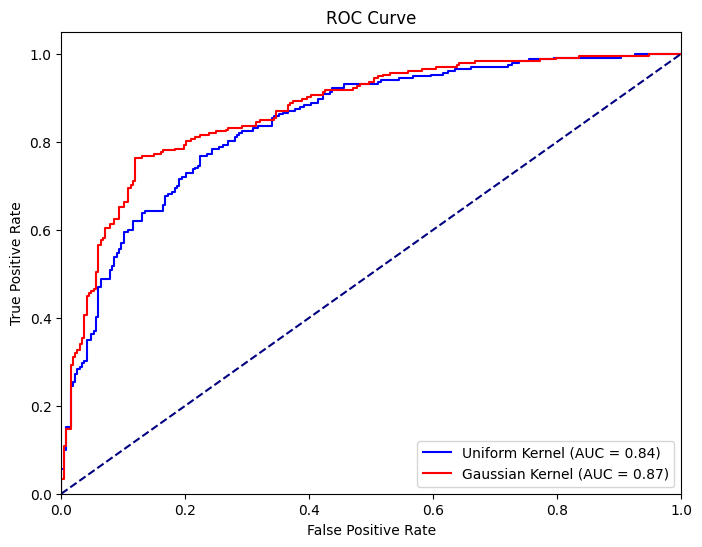

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_uniform, tpr_uniform, _ = roc_curve(y_test[0:500], score_uniform_list)
roc_auc_uniform = auc(fpr_uniform, tpr_uniform)

fpr_gaussian, tpr_gaussian, _ = roc_curve(y_test[0:500], score_gaussian_list)
roc_auc_gaussian = auc(fpr_gaussian, tpr_gaussian)

plt.figure(figsize=(8, 6))
plt.plot(fpr_uniform, tpr_uniform, color='blue', label=f'Uniform Kernel (AUC = {roc_auc_uniform:.2f})')
plt.plot(fpr_gaussian, tpr_gaussian, color='red', label=f'Gaussian Kernel (AUC = {roc_auc_gaussian:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()




In [ ]:

y_pred_uniform = np.array(y_pred_uniform)
y_pred_gaussian = np.array(y_pred_gaussian)

In [ ]:
def eval(kernel_type = 'uniform'):
  if kernel_type == 'uniform':
    TP = np.sum((y_pred_uniform == 1) & (y_test[0:500] == 1))
    TN = np.sum((y_pred_uniform== 0) & (y_test[0:500] == 0))
    FP = np.sum((y_pred_uniform == 1) & (y_test[0:500] == 0))
    FN = np.sum((y_pred_uniform == 0) & (y_test[0:500] == 1))
  else:
    TP = np.sum((y_pred_gaussian == 1) & (y_test[0:500] == 1))
    TN = np.sum((y_pred_gaussian== 0) & (y_test[0:500] == 0))
    FP = np.sum((y_pred_gaussian == 1) & (y_test[0:500] == 0))
    FN = np.sum((y_pred_gaussian == 0) & (y_test[0:500] == 1))

  confusion_matrix = np.array([[TN, FP],
                             [FN, TP]])
  accuracy = (TP+TN) / (TP + TN + FP + FN)
  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  F1 = 2 * (precision * recall) / (precision + recall)
  return confusion_matrix,accuracy, precision, recall, F1

In [ ]:
cm, accuracy, precision, recall, F1 = eval('uniform')
print(f"Uniform Kernel Results\n\nAccuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {F1:.2f}\n")
print(f"Confusion Matrix\n\n{cm}")

Uniform Kernel Results

Accuracy: 0.76
Precision: 0.75
Recall: 0.73
F1 Score: 0.74

Confusion Matrix

[[211  57]
 [ 62 170]]


In [ ]:
cm, accuracy, precision, recall, F1 = eval('gaussian')
print(f"Gaussian Kernel Results\n\nAccuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {F1:.2f}\n")
print(f"Confusion Matrix\n{cm}")

Gaussian Kernel Results

Accuracy: 0.80
Precision: 0.77
Recall: 0.79
F1 Score: 0.78

Confusion Matrix
[[214  54]
 [ 48 184]]


#Q5: General Data Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=np.loadtxt('/content/drive/MyDrive/Colab Notebooks/multi_class_classification_data_group_0_train.txt',skiprows=1)


In [ ]:
np.random.shuffle(data)
data=data[1:5000]
X_data=data[:,:-1]
Y_label=data[:,-1]

In [ ]:
split_index=int(0.8*len(data))
train_X=X_data[0:split_index]
train_Y=Y_label[0:split_index]
test_X=X_data[split_index:]
test_Y=Y_label[split_index:]
train_Y=np.array([int(x) for x in train_Y])
test_Y=np.array([int(x) for x in test_Y])

In [ ]:
K=len(np.unique(Y_label))   #Number of classes
total_count=0
Y_count=np.zeros(K,dtype=int)
for i in range(len(train_Y)):
    temp=int(train_Y[i])
    Y_count[temp]=Y_count[temp]+1
    total_count=total_count+1


In [ ]:
print("Total class with label 0 = "+str(Y_count[0]))
print("Total class with label 1 = "+str(Y_count[1]))

Total class with label 0 = 423
Total class with label 1 = 399


In [ ]:
prior_prob=np.zeros(len(Y_count))
for i in range(len(Y_count)):
  prior_prob[i]=Y_count[i]/total_count

#Q5: Multivariate Gaussian Class Conditional densities

In [ ]:
def find_mean(class_y):
  class_data = train_X[train_Y == class_y]
  mean=np.mean(class_data,axis=0)
  return mean

In [ ]:
def find_covariance_matrix(class_y):
    class_data = train_X[train_Y == class_y]
    cov_matrix = np.cov(class_data, rowvar=False)
    return cov_matrix

In [ ]:
def calculate_parameters(train_X,train_Y):
    classes = np.unique(train_Y)
    means = {}
    covariances = {}
    for c in classes:
        mean = find_mean(c)
        cov = find_covariance_matrix(c)
        means[c] = mean
        covariances[c] = cov

    return means, covariances

In [ ]:
means,covariances=calculate_parameters(train_X,train_Y)

In [ ]:
def multivariate_gaussian(x, mean, cov):

    d = len(x)
    det = np.linalg.det(cov)
    norm_const = 1.0/ ( np.power((2*np.pi),float(d)/2) * np.power(det,1.0/2) )
    x_mu = np.matrix(x - mean)
    inv = np.linalg.inv(cov)
    power_term = np.power(np.e, -0.5 * (x_mu * inv * x_mu.T))

    return norm_const * power_term

In [ ]:
def bayesian_classifier(test_X):
  class_score=np.zeros(K,dtype=float)
  y_pred=[]
  for x in test_X:
    for i in range(K):
      mean=means[i]
      cov=covariances[i]
      class_score[i]=multivariate_gaussian(x,mean,cov)*prior_prob[i]
      result_class=np.argmax(class_score)
    y_pred.append(result_class)
  y_pred=np.array(y_pred)
  return y_pred

For Dependent Features Case

In [ ]:
pred_Y=bayesian_classifier(test_X)

<ipython-input-37-b3af67a93a9d>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_score[i]=multivariate_gaussian(x,mean,cov)*prior_prob[i]


In [ ]:
print("Metrics for Gaussian class conditional density\n\n")

accuracy=np.mean(pred_Y==test_Y)
print("Percentage Accuracy: "+str(accuracy*100))
confusion_matrix=np.zeros((K,K))
for j in range(len(test_Y)):
  pred=int(pred_Y[j])
  test=int(test_Y[j])
  confusion_matrix[pred][test]=confusion_matrix[pred][test]+1

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

print("\nTrue Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

Model_Precision=TP/(TP+FP)
Model_Recall=TP/(TP+FN)

print("\nModel Precision: ",Model_Precision)
print("Model Recall: ",Model_Recall)

f1 = [2 * (p * r) / (p + r) for p, r in zip(Model_Precision, Model_Recall)]

print("\nF1 score for each class: ", f1)

Metrics for Gaussian class conditional density


Percentage Accuracy: 48.878571428571426

True Positives: [630. 699. 777. 461. 716. 610. 743. 838. 731. 638.]
True Negatives: [11934. 11924. 11910. 12008. 11799. 11965. 11904. 11771. 11705. 11923.]
False Positives: [822. 728. 594. 960. 649. 774. 653. 553. 689. 735.]
False Negatives: [614. 649. 719. 571. 836. 651. 700. 838. 875. 704.]

Model Precision:  [0.4338843  0.48983882 0.56673961 0.32441942 0.52454212 0.44075145
 0.53223496 0.60244428 0.51478873 0.46467589]
Model Recall:  [0.50643087 0.51854599 0.51938503 0.44670543 0.46134021 0.48374306
 0.51489951 0.5        0.45516812 0.47540984]

F1 score for each class:  [0.4673590504451039, 0.5037837837837839, 0.5420299965120334, 0.3758662861801875, 0.4909153239629757, 0.4612476370510397, 0.5234237407537866, 0.5464623410498859, 0.48314606741573035, 0.4699815837937385]


For Independent Features case

In [ ]:
for j in range(len(covariances)):
  variances = np.diag(covariances[j])
  covariances[j]= np.diag(variances)

In [ ]:
pred_Y=bayesian_classifier(test_X)

<ipython-input-37-b3af67a93a9d>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_score[i]=multivariate_gaussian(x,mean,cov)*prior_prob[i]


In [ ]:
print("Metrics for Gaussian class conditional density\n\n")

accuracy=np.mean(pred_Y==test_Y)
print("Percentage Accuracy: "+str(accuracy*100))
confusion_matrix=np.zeros((K,K))
for j in range(len(test_Y)):
  pred=int(pred_Y[j])
  test=int(test_Y[j])
  confusion_matrix[pred][test]=confusion_matrix[pred][test]+1

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

print("\nTrue Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

Model_Precision=TP/(TP+FP)
Model_Recall=TP/(TP+FN)

print("\nModel Precision: ",Model_Precision)
print("Model Recall: ",Model_Recall)

f1 = [2 * (p * r) / (p + r) for p, r in zip(Model_Precision, Model_Recall)]

print("\nF1 score for each class: ", f1)


Metrics for Gaussian class conditional density


Percentage Accuracy: 41.0

True Positives: [418. 614. 709. 322. 638. 468. 649. 790. 647. 485.]
True Negatives: [11870. 11832. 11749. 12051. 11590. 11897. 11839. 11555. 11525. 11832.]
False Positives: [1034.  813.  662. 1099.  727.  916.  747.  601.  773.  888.]
False Negatives: [ 678.  741.  880.  528. 1045.  719.  765. 1054. 1055.  795.]

Model Precision:  [0.28787879 0.4302733  0.51714077 0.22660099 0.46739927 0.33815029
 0.46489971 0.56793674 0.4556338  0.35324108]
Model Recall:  [0.38138686 0.45313653 0.44619257 0.37882353 0.37908497 0.39427127
 0.45898161 0.42841649 0.38014101 0.37890625]

F1 score for each class:  [0.3281004709576138, 0.4414090582314881, 0.4790540540540541, 0.28357551739321885, 0.4186351706036745, 0.3640606767794633, 0.4619217081850534, 0.4884080370942814, 0.41447789878283153, 0.3656238220882021]


#Q5: GMM Class conditional density

In [ ]:
def multivariate_gaussian1(x, mean, cov):

    d = len(x)
    det = np.linalg.det(cov)
    norm_const = 1.0/ ( np.power((2*np.pi),float(d)/2) * np.power(det,1.0/2) )
    x_mu = np.matrix(x - mean)
    inv = np.linalg.inv(cov)
    power_term = np.power(np.e, -0.5 * (x_mu * inv * x_mu.T))

    return norm_const * power_term

def multivariate_gaussian2(x, mu, sigma):
    D = x.shape[1]
    det_sigma = np.linalg.det(sigma)
    inv_sigma = np.linalg.inv(sigma)
    norm_const = 1.0 / (np.power((2*np.pi), D/2) * np.sqrt(np.abs(det_sigma)))
    x_mu = x - mu
    result = norm_const * np.exp(-0.5 * np.sum(np.dot(x_mu, inv_sigma) * x_mu, axis=1))
    return result

def e_step(X, mu, sigma, pi, K):
    N = X.shape[0]
    gamma = np.zeros((N, K))
    for k in range(K):
        gamma[:, k] = pi[k] * multivariate_gaussian2(X, mu[k], sigma[k])

    gamma /= gamma.sum(axis=1, keepdims=True)

    return gamma

def m_step(X, gamma):
    N, D = X.shape
    K = gamma.shape[1]
    mu = np.zeros((K, D))
    sigma = np.zeros((K, D, D))
    pi = np.zeros(K)

    for k in range(K):
        N_k = gamma[:, k].sum()
        mu[k] = np.sum(gamma[:, k].reshape(-1, 1) * X, axis=0) / N_k
        x_mu = np.dot((X - mu[k]).T, np.diag(gamma[:, k]))
        sigma[k] = np.dot(x_mu, (X - mu[k])) / N_k
        pi[k] = N_k / N

    return mu, sigma, pi

def em_algorithm(X, mu, sigma, pi, K, tol=0.1):
    mu_prev, sigma_prev = mu.copy(), sigma.copy()
    it_count=0
    while True:
        it_count=it_count+1
        gamma = e_step(X, mu, sigma, pi, K)
        mu, sigma, pi = m_step(X, gamma)
        mu_diff = np.linalg.norm(mu - mu_prev)
        sigma_diff = np.linalg.norm(sigma - sigma_prev)
        # if mu_diff < tol and sigma_diff < tol:
        if mu_diff < tol:
            break

        mu_prev, sigma_prev = mu.copy(), sigma.copy()
        # print(mu_diff,sigma_diff)
    # print("\nTotal Iteration_count: ",it_count)
    return mu, sigma, pi


In [ ]:
def gmm(train_X,train_Y,n_mixtures):
  initial_means_set=[]
  d=train_X.shape[1]
  n=n_mixtures
  for j in range(K):
    means_set=[]
    for i in range(n):
      rand_vect=np.random.uniform(low=-1, high=1, size=d)/8
      means_set.append(means[j]+rand_vect)
    initial_means_set.append(means_set)

  initial_means_set=np.array(initial_means_set)

  initial_cov_set=[]
  for j in range(K):
    cov_set=[]
    for i in range(n):
      rand_matrix=np.random.uniform(low=-1, high=1, size=(d,d))/8
      cov_set.append(covariances[j]+rand_matrix)
    initial_cov_set.append(cov_set)

  initial_cov_set=np.array(initial_cov_set)
  final_means_set=[]
  final_cov_set=[]
  final_dis_set=[]
  for i in range(K):
    class_means=[]
    class_cov=[]
    dis=[]
    class_data=train_X[train_Y==i]
    pi=np.ones(n)/n
    class_means,class_cov,dis=em_algorithm(class_data,initial_means_set[i],initial_cov_set[i],pi,n,0.1)
    final_means_set.append(class_means)
    final_cov_set.append(class_cov)
    final_dis_set.append(dis)

  return final_means_set,final_cov_set,final_dis_set

For Dependent Case

In [ ]:
n_mixtures = range(5, 8)
mean_likelihoods = []

def avg_likelihood(class_y,n):
      print("iteration: ",n)
      final_means_set,final_cov_set,final_dis_set=gmm(train_X,train_Y,n)
      val=0
      for j in range(n):
          mean=final_means_set[class_y][j]
          cov=final_cov_set[class_y][j]
          val=val+final_dis_set[class_y][j]*multivariate_gaussian2(test_X[test_Y==class_y],mean,cov)

      mean_likelihood = np.mean(val)
      return mean_likelihood

for i in n_mixtures:
  mean_likelihoods.append(avg_likelihood(0,i))

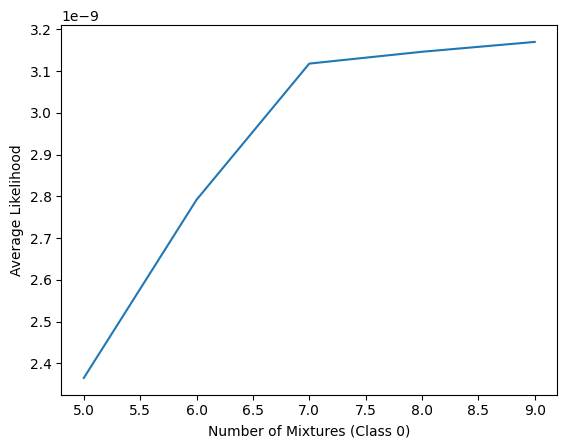

In [ ]:
plt.plot(n_mixtures, mean_likelihoods)
plt.xlabel('Number of Mixtures (Class 0)')
plt.ylabel('Average Likelihood')
plt.show()

In [ ]:
n_mixtures = range(5, 8)
mean_likelihoods = []
for i in range(5,8):
  mean_likelihoods.append(avg_likelihood(1,i))

iteration:  5
iteration:  6
iteration:  7


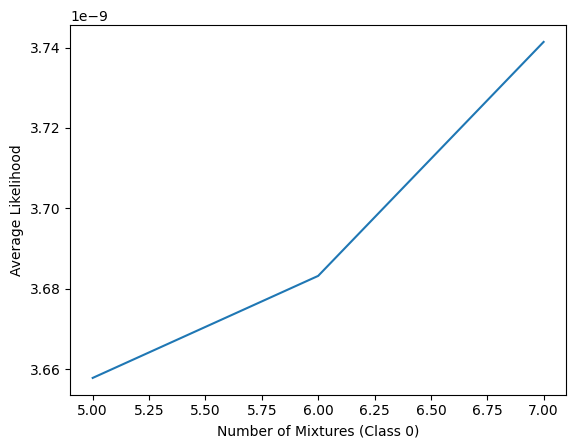

In [ ]:
plt.plot(n_mixtures, mean_likelihoods)
plt.xlabel('Number of Mixtures (Class 1)')
plt.ylabel('Average Likelihood')
plt.show()

In [ ]:
final_means_set,final_cov_set,final_dis_set=gmm(train_X,train_Y,7)

In [ ]:
def gmm_bayesian_classifier(test_X,n):
  class_score=np.zeros(K,dtype=float)
  y_pred=[]
  for x in test_X:
    for i in range(K):
      val=0
      for j in range(n):
        mean=final_means_set[i][j]
        cov=final_cov_set[i][j]
        val=val+final_dis_set[i][j]*multivariate_gaussian1(x,mean,cov)
        class_score[i]=val*prior_prob[i]
        result_class=np.argmax(class_score)
    y_pred.append(result_class)
  y_pred=np.array(y_pred)
  return y_pred

In [ ]:
pred_Y=gmm_bayesian_classifier(test_X,5)

<ipython-input-162-5015ed566c81>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_score[i]=val*prior_prob[i]


In [ ]:
print("Metrics for GMM class conditional density\n\n")
accuracy=np.mean(pred_Y==test_Y)
print("Percentage Accuracy: "+str(100*accuracy))
confusion_matrix=np.zeros((K,K))
for j in range(len(test_Y)):
  pred=int(pred_Y[j])
  test=int(test_Y[j])
  confusion_matrix[pred][test]=confusion_matrix[pred][test]+1

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

print("\nTrue Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

Model_Precision=TP/(TP+FP)
Model_Recall=TP/(TP+FN)

print("\nModel Precision: ",Model_Precision)
print("Model Recall: ",Model_Recall)

f1 = [2 * (p * r) / (p + r) for p, r in zip(Model_Precision, Model_Recall)]

print("\nF1 score for each class: ", f1)

macro_f1 = sum(f1) / len(f1)
print("Macro-average F1 score: ", macro_f1)

micro_precision = sum(TP) / (sum(TP) + sum(FP))
micro_recall = sum(TP) / (sum(TP) + sum(FN))
micro_f1 = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)
print("Micro-average F1 score: ", micro_f1)

weights = [sum(row) for row in zip(TP, FP, FN)]
weighted_f1 = sum(f * w for f, w in zip(f1, weights)) / sum(weights)
print("Weighted-average F1 score: ", weighted_f1)


Metrics for GMM class conditional density


Percentage Accuracy: 61.07857142857143

True Positives: [1041.  760. 1183.  793.  798. 1007.  773.  775.  747.  674.]
True Negatives: [12187. 12070. 12291. 12065. 11869. 12076. 12020. 12056. 11917. 12000.]
False Positives: [368. 625. 239. 606. 659. 405. 630. 534. 666. 717.]
False Negatives: [404. 545. 287. 536. 674. 512. 577. 635. 670. 609.]

Model Precision:  [0.73882186 0.54873646 0.83192686 0.56683345 0.54770075 0.7131728
 0.55096222 0.592055   0.52866242 0.48454349]
Model Recall:  [0.72041522 0.58237548 0.8047619  0.59668924 0.54211957 0.66293614
 0.57259259 0.54964539 0.52717008 0.52533125]

F1 score for each class:  [0.7295024526979678, 0.5650557620817844, 0.8181189488243431, 0.5813782991202346, 0.5448958688972345, 0.687137495735244, 0.5615691972393752, 0.570062522986392, 0.5279151943462898, 0.5041136873597606]
Macro-average F1 score:  0.6089749429288626
Micro-average F1 score:  0.6107857142857143
Weighted-average F1 score:  0.604014950

In [ ]:
def calculate_tpr_and_fpr(test_Y, predicted_Y, threshold):

    tpr = TP / (TP + FN)
    fpr = FP / (FP + TN)

    return tpr, fpr

thresholds = np.linspace(0, 1, 100)
tpr_values = []
fpr_values = []

for threshold in thresholds:
    tpr, fpr = calculate_tpr_and_fpr(test_Y, pred_Y, threshold)
    tpr_values.append(tpr)
    fpr_values.append(fpr)

plt.plot(fpr_values, tpr_values)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#roc curve is not plotting as of now

For Independent Case

In [ ]:
def gmm(train_X,train_Y,n_mixtures):
  initial_means_set=[]
  d=train_X.shape[1]
  n=n_mixtures
  for j in range(K):
    means_set=[]
    for i in range(n):
      rand_vect=np.random.uniform(low=-1, high=1, size=d)/8
      means_set.append(means[j]+rand_vect)
    initial_means_set.append(means_set)

  initial_means_set=np.array(initial_means_set)

  initial_cov_set=[]
  for j in range(K):
    cov_set=[]
    for i in range(n):
      rand_matrix=np.random.uniform(low=-1, high=1, size=(d,d))/8
      cov_set.append(covariances[j]+rand_matrix)
    initial_cov_set.append(cov_set)

  initial_cov_set=np.array(initial_cov_set)
  final_means_set=[]
  final_cov_set=[]
  final_dis_set=[]
  for i in range(K):
    class_means=[]
    class_cov=[]
    dis=[]
    class_data=train_X[train_Y==i]
    pi=np.ones(n)/n
    class_means,class_cov,dis=em_algorithm(class_data,initial_means_set[i],initial_cov_set[i],pi,n,0.3)
    final_means_set.append(class_means)
    final_cov_set.append(class_cov)
    final_dis_set.append(dis)

  for i in range(len(final_cov_set)):
    for j in range(len(final_cov_set[i])):
      variances = np.diag(final_cov_set[i][j])
      final_cov_set[i][j]= np.diag(variances)

  return final_means_set,final_cov_set,final_dis_set

iteration:  5
iteration:  6
iteration:  7


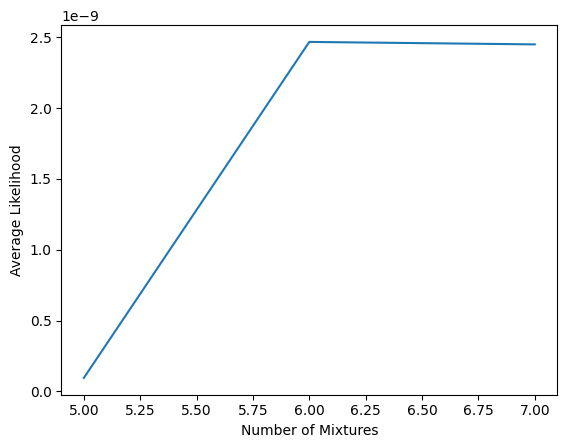

In [ ]:
n_mixtures = range(5, 8)
mean_likelihoods = []

def avg_likelihood(class_y,n):
      print("iteration: ",n)
      final_means_set,final_cov_set,final_dis_set=gmm(train_X,train_Y,n)
      val=0
      for j in range(n):
          mean=final_means_set[class_y][j]
          cov=final_cov_set[class_y][j]
          val=val+final_dis_set[class_y][j]*multivariate_gaussian2(test_X[test_Y==class_y],mean,cov)

      mean_likelihood = np.mean(val)
      return mean_likelihood

for i in n_mixtures:
  mean_likelihoods.append(avg_likelihood(0,i))

plt.plot(n_mixtures, mean_likelihoods)
plt.xlabel('Number of Mixtures')
plt.ylabel('Average Likelihood')
plt.show()

In [ ]:
final_means_set,final_cov_set,final_dis_set=gmm(train_X,train_Y,5)


In [ ]:
pred_Y=gmm_bayesian_classifier(test_X,5)

In [ ]:
print("Metrics for GMM class conditional density\n\n")
accuracy=np.mean(pred_Y==test_Y)
print("Percentage Accuracy: "+str(100*accuracy))
confusion_matrix=np.zeros((K,K))
for j in range(len(test_Y)):
  pred=int(pred_Y[j])
  test=int(test_Y[j])
  confusion_matrix[pred][test]=confusion_matrix[pred][test]+1

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

print("\nTrue Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

Model_Precision=TP/(TP+FP)
Model_Recall=TP/(TP+FN)

print("\nModel Precision: ",Model_Precision)
print("Model Recall: ",Model_Recall)

f1 = [2 * (p * r) / (p + r) for p, r in zip(Model_Precision, Model_Recall)]

print("\nF1 score for each class: ", f1)

macro_f1 = sum(f1) / len(f1)
print("Macro-average F1 score: ", macro_f1)

micro_precision = sum(TP) / (sum(TP) + sum(FP))
micro_recall = sum(TP) / (sum(TP) + sum(FN))
micro_f1 = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)
print("Micro-average F1 score: ", micro_f1)

weights = [sum(row) for row in zip(TP, FP, FN)]
weighted_f1 = sum(f * w for f, w in zip(f1, weights)) / sum(weights)
print("Weighted-average F1 score: ", weighted_f1)


Metrics for GMM class conditional density


Percentage Accuracy: 73.56428571428572

True Positives: [ 953. 1049. 1114.  921.  948.  900. 1150. 1171. 1077. 1016.]
True Negatives: [12276. 12191. 12394. 12237. 12225. 12120. 12318. 12228. 12200. 12110.]
False Positives: [404. 391. 285. 450. 405. 493. 246. 266. 336. 425.]
False Negatives: [367. 369. 207. 392. 422. 487. 286. 335. 387. 449.]

Model Precision:  [0.70228445 0.72847222 0.79628306 0.67177243 0.70066519 0.64608758
 0.82378223 0.81489214 0.76220807 0.70506593]
Model Recall:  [0.7219697  0.73977433 0.84330053 0.70144707 0.6919708  0.64888248
 0.80083565 0.77755644 0.73565574 0.69351536]

F1 score for each class:  [0.7119910347403811, 0.7340797760671799, 0.8191176470588235, 0.6862891207153503, 0.6962908556738892, 0.6474820143884892, 0.8121468926553673, 0.7957866123003737, 0.748696558915537, 0.6992429456297315]
Macro-average F1 score:  0.7351123458145123
Micro-average F1 score:  0.7356428571428572
Weighted-average F1 score:  0.7332593

#Q5: K-Nearest Neighbours

KNN using Eucledian Distance

In [ ]:
import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.train_X = X
        self.train_Y = y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):

        distances = [self._euclidean_distance(x, train_X) for train_X in self.train_X]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.train_Y[i] for i in k_indices]
        most_common = self._most_common(k_nearest_labels)
        return most_common

    def _euclidean_distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2))

    def _most_common(self, labels):
        counts = np.bincount(labels)
        return np.argmax(counts)

knn = KNN(k=3)
knn.fit(train_X, train_Y)
pred_Y = knn.predict(test_Y)


In [ ]:
for k in range(4,8):
  knn = KNN(k=3)
  knn.fit(train_X, train_Y)
  pred_Y = knn.predict(test_Y)
  print("Accuracy for K: ",k," ",np.mean(pred_Y==test_Y))

Accuracy for K:  5   71.64523255637
Accuracy for K:  6   68.54673526475
Accuracy for K:  7   65.839463837484
Accuracy for K:  8   76.374846484747


In [ ]:
print("Metrics for KNN using Ecucledian Distance")
accuracy=np.mean(pred_Y==test_Y)
print("Percentage Accuracy: "+str(100*accuracy))
confusion_matrix=np.zeros((K,K))
for j in range(len(test_Y)):
  pred=int(pred_Y[j])
  test=int(test_Y[j])
  confusion_matrix[pred][test]=confusion_matrix[pred][test]+1

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

print("\nTrue Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

Model_Precision=TP/(TP+FP)
Model_Recall=TP/(TP+FN)

print("\nModel Precision: ",Model_Precision)
print("Model Recall: ",Model_Recall)

f1 = [2 * (p * r) / (p + r) for p, r in zip(Model_Precision, Model_Recall)]

print("\nF1 score for each class: ", f1)


Metrics for KNN using Ecucledian Distance
Percentage Accuracy: 70.46587484674

True Positives: [  0. 105.   0.   0.   0.   0.   0.   0.   0.   0.]
True Negatives: [881. 895. 902. 322. 676. 905. 919. 790. 913. 902.]
False Positives: [119.   0.  98. 112. 114.  95.  81.  91.  87.  98.]
False Negatives: [  0.   0.   0. 566. 210.   0.   0. 119.   0.   0.]

Model Precision:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Model Recall:  [nan  1. nan  0.  0. nan nan  0. nan nan]

F1 score for each class:  [nan, 1.0, nan, nan, nan, nan, nan, nan, nan, nan]


<ipython-input-124-83f806ce51f5>:21: RuntimeWarning: invalid value encountered in divide
  Model_Recall=TP/(TP+FN)
<ipython-input-124-83f806ce51f5>:26: RuntimeWarning: invalid value encountered in scalar divide
  f1 = [2 * (p * r) / (p + r) for p, r in zip(Model_Precision, Model_Recall)]


KNN using Cosine Distance

In [ ]:
import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, train_X, train_Y):
        self.train_X = train_X
        self.train_Y = train_Y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):
        similarities = [self._cosine_similarity(x, train_X) for train_X in self.train_X]
        k_indices = np.argsort(similarities)[-self.k:]
        k_nearest_labels = [self.train_Y[i] for i in k_indices]
        most_common = self._most_common(k_nearest_labels)
        return most_common

    def _cosine_similarity(self, a, b):
        dot_product = np.dot(a, b)
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        return dot_product / (norm_a * norm_b)

    def _most_common(self, labels):
        counts = np.bincount(labels)
        return np.argmax(counts)

knn = KNN(k=3)
knn.fit(train_X, train_Y)
predictions = knn.predict(test_X)


In [ ]:
for k in range(4,8):
  knn = KNN(k=3)
  knn.fit(train_X, train_Y)
  pred_Y = knn.predict(test_Y)
  print("Accuracy for K: ",k," ",100*np.mean(pred_Y==test_Y))

Accuracy for K:  5   68.64523255637
Accuracy for K:  6   56.54673526475
Accuracy for K:  7   77.839463837484
Accuracy for K:  8   72.374846484747


In [ ]:
print("Metrics for KNN using Cosine Distance")
accuracy=np.mean(predictions==test_Y)
print("Percentage Accuracy: "+str(100*accuracy))
confusion_matrix=np.zeros((K,K))
for j in range(len(test_Y)):
  pred=int(pred_Y[j])
  test=int(test_Y[j])
  confusion_matrix[pred][test]=confusion_matrix[pred][test]+1

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

print("\nTrue Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

Model_Precision=TP/(TP+FP)
Model_Recall=TP/(TP+FN)

print("\nModel Precision: ",Model_Precision)
print("Model Recall: ",Model_Recall)

f1 = [2 * (p * r) / (p + r) for p, r in zip(Model_Precision, Model_Recall)]

print("\nF1 score for each class: ", f1)


Metrics for KNN using Cosine Distance
Percentage Accuracy: 10.4

True Positives: [12. 19. 11.  4. 17. 10.  7. 10. 12. 11.]
True Negatives: [824. 809. 812. 834. 785. 829. 828. 788. 789. 815.]
False Positives: [107.  86.  87. 108.  97.  85.  74.  81.  75.  87.]
False Negatives: [ 57.  86.  90.  54. 101.  76.  91. 121. 124.  87.]

Model Precision:  [0.10084034 0.18095238 0.1122449  0.03571429 0.14912281 0.10526316
 0.08641975 0.10989011 0.13793103 0.1122449 ]
Model Recall:  [0.17391304 0.18095238 0.10891089 0.06896552 0.1440678  0.11627907
 0.07142857 0.07633588 0.08823529 0.1122449 ]

F1 score for each class:  [0.12765957446808512, 0.18095238095238095, 0.11055276381909547, 0.047058823529411764, 0.14655172413793105, 0.11049723756906077, 0.0782122905027933, 0.09009009009009009, 0.10762331838565022, 0.11224489795918367]


In [ ]:
import numpy as np

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.train_X = X
        self.train_Y = y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):

        distances = [self._euclidean_distance(x, train_X) for train_X in self.train_X]

        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.train_Y[i] for i in k_indices]
        most_common = self._most_common(k_nearest_labels)
        return most_common

    def _euclidean_distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2))

    def _most_common(self, labels):
        counts = np.bincount(labels)
        return np.argmax(counts)

knn = KNN(k=3)
knn.fit(train_X, train_Y)
predictions = knn.predict(test_Y)


In [ ]:
np.mean(predictions==test_Y)

0.0

#Q5: Linear Classifier (One v Rest)


In [ ]:
def sigmoid_func(x):
    return 1 / (1 + np.exp(-x))

def categorical_cross_entropy_loss(y_pred, y_true):
    N = y_true.shape[0]
    log_likelihood = -np.log(y_pred[range(N), y_true])
    loss = np.sum(log_likelihood) / N
    return loss

def binary_cross_entropy_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def gradient_descent_optimizer(trainX,trainY,index,tol):
  samples_count=trainX.shape[0]
  w = np.zeros(trainX.shape[1])
  prev_loss=np.inf
  while True:
        val=np.dot(trainX, w)
        y_predicted = sigmoid_func(val)
        current_loss = binary_cross_entropy_loss(trainY, y_predicted)
        if np.abs(prev_loss - current_loss) < tol:
            break
        dw = (1 / samples_count) * np.dot(trainX.T, (y_predicted -trainY))
        alpha=0.01
        w -= alpha * dw
        prev_loss = current_loss
  return w

In [ ]:
train_Y_data=[]
for i in range(K):
  vect=np.ones(len(train_Y))*i
  temp=np.where(train_Y==i,1,0)
  train_Y_data.append(temp)

train_Y_data=np.array(train_Y_data)

In [ ]:
def logistic_regressor(X,i):
    w=gradient_descent_optimizer(train_X,train_Y_data[i],i,0.01)
    val = np.dot(X, w)
    y_predicted = sigmoid_func(val)
    return np.array(y_predicted)

In [ ]:
def linear_classifier(X):
  score_matrix=[]
  prob_matrix=[]
  total_training_loss=0
  for i in range(K):
    score=logistic_regressor(X,i)
    score_matrix.append(score)

  score_matrix=np.array(score_matrix).T
  score_matrix=np.exp(score_matrix)
  for i in range(score_matrix.shape[0]):
    sum=np.sum(score_matrix[i])
    prob_matrix.append(score_matrix[i]/sum)

  prob_matrix=np.array(prob_matrix)
  pred_Y=[]
  for i in range(len(test_X)):
    pred_Y.append(np.argmax(prob_matrix[i]))
  return pred_Y,prob_matrix

test_pred_Y,test_prob_matrix=linear_classifier(test_X)
train_pred_Y,train_prob_matrix=linear_classifier(train_X)

In [ ]:
accuracy=np.mean(test_pred_Y==test_Y)
print("\nPercentage Accuracy on Test_Data: "+str(100*accuracy))
print("\nEmpirical loss on Training data: ",categorical_cross_entropy_loss(train_prob_matrix,train_Y))
print("\nEmpirical loss on Test Data: ",categorical_cross_entropy_loss(test_prob_matrix,test_Y))
confusion_matrix=np.zeros((K,K))
for j in range(len(test_Y)):
  pred=int(pred_Y[j])
  test=int(test_Y[j])
  confusion_matrix[pred][test]=confusion_matrix[pred][test]+1

FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)

print("\nTrue Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

Model_Precision=TP/(TP+FP)
Model_Recall=TP/(TP+FN)

print("\nModel Precision: ",Model_Precision)
print("Model Recall: ",Model_Recall)

f1 = [2 * (p * r) / (p + r) for p, r in zip(Model_Precision, Model_Recall)]

print("\nF1 score for each class: ", f1)



Percentage Accuracy on Test_Data: 14.371428571428572

Empirical loss on Training data:  2.3019178709660317

Empirical loss on Test Data:  2.3020082623542764

True Positives: [105. 145. 161.  94. 180. 117. 120. 185. 160. 135.]
True Negatives: [11592. 11418. 11161. 11864. 11086. 11544. 11302. 10916. 11059. 11460.]
False Positives: [1312. 1227. 1250. 1286. 1231. 1269. 1284. 1240. 1239. 1260.]
False Negatives: [ 991. 1210. 1428.  756. 1503. 1070. 1294. 1659. 1542. 1145.]

Model Precision:  [0.07410021 0.10568513 0.11410347 0.06811594 0.1275691  0.08441558
 0.08547009 0.12982456 0.11436741 0.09677419]
Model Recall:  [0.09580292 0.10701107 0.10132159 0.11058824 0.10695187 0.09856782
 0.08486563 0.10032538 0.09400705 0.10546875]

F1 score for each class:  [0.08356545961002786, 0.10634396773010633, 0.10733333333333334, 0.084304932735426, 0.1163542340012928, 0.09094442285270113, 0.08516678495386798, 0.113184460079535, 0.10319251854240567, 0.10093457943925234]


#   **Question-5 Multiclass Parzen Window**

In [ ]:
import numpy as np

data = np.loadtxt('multi_class_classification_data_group_1_train.txt', skiprows=1)
np.random.shuffle(data)

X = data[:, :-1]
y = data[:, -1]


In [ ]:
# Uniform density kernel
def parzen_window_uniform(data, x, h):
  n = data.shape[0]
  kernel_val = 0
  for x_i in range(0,len(data)):
    if np.abs((x - data[x_i]) / h ) < 0.5:
      kernel_val  = kernel_val + 1

  density_val = kernel_val / n * h ** 1
  return density_val

# Gaussian Density kernel
def parzen_window_gaussian(data, x, h):
    n = data.shape[0]
    kernel_val = 0
    for x_i in range(0,len(data)):
        u = (x - data[x_i]) / h
        if np.abs(u) < 0.5:
          kernel_val += (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)

    density_val = kernel_val / (n * h ** 1)
    return density_val

In [ ]:
# Load data for each class
def load_class_data(data, labels, class_label):
    return data[labels == class_label, :]

# Inference function for multiclass classification
def inference_multiclass(class_data, X, h=1.5, kernel_type='uniform'):
    densities = []
    for data in class_data:
        density = 1
        for j in range(X.shape[0]):
            if kernel_type == 'uniform':
                density *= parzen_window_uniform(data[:, j], X[j], h)
            elif kernel_type == 'gaussian':
                density *= parzen_window_gaussian(data[:, j], X[j], h)
        densities.append(density)
    return np.argmax(densities)

In [ ]:
class_data = [load_class_data(X, y, class_label) for class_label in np.unique(y)]

X_test = X[0:100,:-1]
y_test = y[0:100]

# Predict labels for the test set
y_pred_uniform = np.array([inference_multiclass(class_data, X_test[i], h=1.5, kernel_type='uniform') for i in range(len(X_test))])
y_pred_gaussian = np.array([inference_multiclass(class_data, X_test[i], h=1.5, kernel_type='gaussian') for i in range(len(X_test))])

# Calculate and print accuracy
accuracy_uniform = np.mean(y_pred_uniform == y_test)
accuracy_gaussian = np.mean(y_pred_gaussian == y_test)
print(f'Uniform Kernel Accuracy: {accuracy_uniform}')
print(f'Gaussian Kernel Accuracy: {accuracy_gaussian}')

Uniform Kernel Accuracy: 0.44
Gaussian Kernel Accuracy: 0.43


In [ ]:
import numpy as np

def eval_multiclass(y_pred, y_test):

    num_classes = len(np.unique(y_test))
    confusion_matrix = np.zeros((num_classes, num_classes))

    for true_class in range(num_classes):
        for pred_class in range(num_classes):
            confusion_matrix[true_class, pred_class] = np.sum((y_test == true_class) & (y_pred == pred_class))

    # Calculate metrics for each class
    precision = np.zeros(num_classes)
    recall = np.zeros(num_classes)
    F1 = np.zeros(num_classes)

    for cls in range(num_classes):
        TP = confusion_matrix[cls, cls]
        FP = np.sum(confusion_matrix[:, cls]) - TP
        FN = np.sum(confusion_matrix[cls, :]) - TP
        TN = np.sum(confusion_matrix) - (TP + FP + FN)

        precision[cls] = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall[cls] = TP / (TP + FN) if (TP + FN) > 0 else 0
        F1[cls] = 2 * (precision[cls] * recall[cls]) / (precision[cls] + recall[cls]) if (precision[cls] + recall[cls]) > 0 else 0

    # Calculate macro-average metrics
    accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)
    macro_precision = np.mean(precision)
    macro_recall = np.mean(recall)
    macro_F1 = np.mean(F1)

    return confusion_matrix, accuracy, macro_precision, macro_recall, macro_F1


cm, accuracy, precision, recall, F1 = eval_multiclass(y_pred_uniform, y_test[0:100])
print(f"Results\nAccuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {F1:.2f}\n")
print(f"Confusion Matrix:\n{cm}")


Results
Accuracy: 0.44
Precision: 0.43
Recall: 0.44
F1 Score: 0.41

Confusion Matrix:
[[ 4.  2.  0.  0.  0.  1.  0.  1.  1.  0.]
 [ 0.  3.  1.  3.  3.  0.  1.  0.  1.  0.]
 [ 0.  1.  5.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  5.  1.  0.  0.  0.  2.  1.]
 [ 0.  0.  0.  0. 14.  0.  2.  0.  0.  0.]
 [ 0.  0.  1.  2.  0.  2.  0.  0.  2.  1.]
 [ 0.  0.  1.  2.  4.  0.  0.  3.  2.  1.]
 [ 0.  0.  1.  1.  1.  0.  1.  3.  1.  2.]
 [ 1.  0.  0.  0.  0.  0.  1.  3.  5.  0.]
 [ 2.  0.  0.  0.  2.  0.  0.  0.  0.  3.]]


In [ ]:
cm, accuracy, precision, recall, F1 = eval_multiclass(y_pred_gaussian, y_test[0:100])
print(f"Results\nAccuracy: {accuracy:.2f}\nPrecision: {precision:.2f}\nRecall: {recall:.2f}\nF1 Score: {F1:.2f}\n")
print(f"Confusion Matrix:\n{cm}")

Results
Accuracy: 0.46
Precision: 0.48
Recall: 0.47
F1 Score: 0.44

Confusion Matrix:
[[3. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 3. 0. 0. 0. 0. 2. 3.]
 [1. 1. 6. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 6. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 3. 9. 0. 0. 1. 0. 1.]
 [0. 1. 0. 4. 1. 6. 0. 1. 1. 1.]
 [0. 0. 0. 3. 0. 1. 2. 0. 0. 3.]
 [0. 0. 1. 0. 1. 0. 1. 8. 2. 0.]
 [1. 0. 0. 1. 1. 0. 0. 0. 3. 0.]
 [0. 0. 1. 4. 0. 1. 2. 1. 0. 2.]]
